In [18]:
import pandas as pd

# 데이터 불러오기 및 상단 5개 데이터 확인
df = pd.read_csv('C:\\Users\\taek5\\Desktop\\TG\\SmartFactory\\data\\HeatTreatmentQualityAssurance\\data.csv', encoding = 'cp949')
pd.set_option('display.max_columns', None) #전체 컬럼 보기
df.head()

TAG_MIN    배정번호  건조 1존 OP  건조 2존 OP  건조로 온도 1 Zone  \
0  2022-01-03 11:22:07  102410   75.6648   30.0155            NaN   
1  2022-01-03 11:22:08  102410   75.6706   32.2732            NaN   
2  2022-01-03 11:22:09  102410   75.6776   32.1592        98.8533   
3  2022-01-03 11:22:11  102410   75.8656   30.8312        98.7918   
4  2022-01-03 11:22:12  102410   73.6468   29.5274        98.7918   

   건조로 온도 2 Zone     세정기  소입1존 OP  소입2존 OP  소입3존 OP  소입4존 OP  소입로 CP 값  \
0            NaN 68.4386  72.8403  59.7862  51.7169  71.8405    0.4504   
1            NaN 68.4386  78.4415  61.6286  50.4453  70.5198    0.4504   
2        99.1460 68.4386  78.1099  61.5414  52.0196  72.0384    0.4503   
3        99.1767 68.4999  77.5072  60.6663  52.6942  73.4815    0.4502   
4        99.2075 68.4386  76.0262  61.1634  51.6915  71.6093    0.4502   

   소입로 CP 모니터 값  소입로 온도 1 Zone  소입로 온도 2 Zone  소입로 온도 3 Zone  소입로 온도 4 Zone  \
0           NaN            NaN       859.8540            NaN            NaN   
1        0.0000       860.3380       859.7800       860.0440       859.7860   
2        0.0000       860.3380       859.7800       859.9810       859.7240   
3        0.0000       860.3380       859.8420       859.9500       859.5990   
4        0.0000       860.3510       859.7910       859.9910       859.7310   

   솔트 컨베이어 온도 1 Zone  솔트 컨베이어 온도 2 Zone  솔트조 온도 1 Zone  솔트조 온도 2 Zone  
0                NaN                NaN            NaN            NaN  
1           294.6580           272.5380       328.7340       328.8650  
2           294.6580           272.5380       328.7340       328.8050  
3           294.7190           272.5380       328.6740       328.8650  
4           294.7210           272.5990       328.7400       328.8080

In [19]:
# 데이터 행, 열 개수
df.shape

(2939722, 21)

In [20]:
# 데이터의 기본 정보 확인
df.dtypes

TAG_MIN               object
배정번호                   int64
건조 1존 OP             float64
건조 2존 OP             float64
건조로 온도 1 Zone        float64
건조로 온도 2 Zone        float64
세정기                  float64
소입1존 OP              float64
소입2존 OP              float64
소입3존 OP              float64
소입4존 OP              float64
소입로 CP 값             float64
소입로 CP 모니터 값         float64
소입로 온도 1 Zone        float64
소입로 온도 2 Zone        float64
소입로 온도 3 Zone        float64
소입로 온도 4 Zone        float64
솔트 컨베이어 온도 1 Zone    float64
솔트 컨베이어 온도 2 Zone    float64
솔트조 온도 1 Zone        float64
솔트조 온도 2 Zone        float64
dtype: object

In [21]:
# 날짜 데이터 형식 변환
df['TAG_MIN'] = pd.to_datetime(df.TAG_MIN, format = '%Y-%m-%d %H:%M:%S')

In [22]:
# 날짜 데이터 형식 변환 후, 데이터 타입 확인
df.dtypes

TAG_MIN              datetime64[ns]
배정번호                          int64
건조 1존 OP                    float64
건조 2존 OP                    float64
건조로 온도 1 Zone               float64
건조로 온도 2 Zone               float64
세정기                         float64
소입1존 OP                     float64
소입2존 OP                     float64
소입3존 OP                     float64
소입4존 OP                     float64
소입로 CP 값                    float64
소입로 CP 모니터 값                float64
소입로 온도 1 Zone               float64
소입로 온도 2 Zone               float64
소입로 온도 3 Zone               float64
소입로 온도 4 Zone               float64
솔트 컨베이어 온도 1 Zone           float64
솔트 컨베이어 온도 2 Zone           float64
솔트조 온도 1 Zone               float64
솔트조 온도 2 Zone               float64
dtype: object

In [23]:
# 결측치 개수 확인
df.isnull().sum()

TAG_MIN                 0
배정번호                    0
건조 1존 OP                1
건조 2존 OP                1
건조로 온도 1 Zone         116
건조로 온도 2 Zone         148
세정기                    91
소입1존 OP              4288
소입2존 OP                 0
소입3존 OP                 2
소입4존 OP                 3
소입로 CP 값                1
소입로 CP 모니터 값          147
소입로 온도 1 Zone         130
소입로 온도 2 Zone         128
소입로 온도 3 Zone         157
소입로 온도 4 Zone         170
솔트 컨베이어 온도 1 Zone     106
솔트 컨베이어 온도 2 Zone     142
솔트조 온도 1 Zone         209
솔트조 온도 2 Zone         203
dtype: int64

In [24]:
# 시간 순으로 정렬
df = df.sort_values(by = ['배정번호', 'TAG_MIN'])

# 아래에서 위 방향으로 채우기
df = df.fillna(method = 'bfill')

In [25]:
# 결측치 처리 결과 확인
df.isnull().sum()

TAG_MIN              0
배정번호                 0
건조 1존 OP             0
건조 2존 OP             0
건조로 온도 1 Zone        0
건조로 온도 2 Zone        0
세정기                  0
소입1존 OP              0
소입2존 OP              0
소입3존 OP              0
소입4존 OP              0
소입로 CP 값             0
소입로 CP 모니터 값         0
소입로 온도 1 Zone        0
소입로 온도 2 Zone        0
소입로 온도 3 Zone        0
소입로 온도 4 Zone        0
솔트 컨베이어 온도 1 Zone    0
솔트 컨베이어 온도 2 Zone    0
솔트조 온도 1 Zone        0
솔트조 온도 2 Zone        0
dtype: int64

In [26]:
# 경고문구 제거 코드
import warnings
warnings.filterwarnings(action = 'ignore')

In [27]:
# 데이터 단위 변경(초 -> 분)
df['Date'] = df['TAG_MIN'].dt.strftime('%Y%m%d %H:%M')
df_minute = df.groupby(['배정번호', 'Date']).mean().reset_index()
df_minute.head()

배정번호            Date  건조 1존 OP  건조 2존 OP  건조로 온도 1 Zone  건조로 온도 2 Zone  \
0  102410  20220103 11:22   75.9761   30.9310        98.7955        99.1463   
1  102410  20220103 11:23   76.6043   31.7213        98.8176        99.0784   
2  102410  20220103 11:24   76.2671   32.2290        98.9301        99.0842   
3  102410  20220103 11:25   75.8917   32.0185        99.0983        99.1409   
4  102410  20220103 11:26   76.0652   32.7423        99.2799        99.2136   

      세정기  소입1존 OP  소입2존 OP  소입3존 OP  소입4존 OP  소입로 CP 값  소입로 CP 모니터 값  \
0 68.4727  74.8423  60.5874  51.5053  71.3018    0.4491        0.0000   
1 68.5287  66.1980  60.4544  51.5384  71.3132    0.4504        0.0000   
2 68.6288  70.9439  60.3524  51.5901  71.7792    0.4498        0.0000   
3 68.7164  88.0877  59.7708  51.0080  71.1196    0.4507        0.0000   
4 68.8008  94.4225  58.8749  50.1784  71.1587    0.4492        0.0000   

   소입로 온도 1 Zone  소입로 온도 2 Zone  소입로 온도 3 Zone  소입로 온도 4 Zone  \
0       860.3358       859.8199       860.0228       859.7588   
1       860.6172       859.8132       860.0583       859.7549   
2       860.6924       859.8500       860.0675       859.7358   
3       859.9129       859.9436       860.1280       859.8006   
4       859.1048       860.1301       860.2602       859.8901   

   솔트 컨베이어 온도 1 Zone  솔트 컨베이어 온도 2 Zone  솔트조 온도 1 Zone  솔트조 온도 2 Zone  
0           294.9422           272.9310       328.7625       328.8799  
1           295.3441           273.8712       328.8194       328.8999  
2           295.4813           274.9540       328.7330       328.8816  
3           295.3642           276.1310       328.7699       328.8771  
4           295.0260           277.3738       328.8031       328.9002

In [28]:
# 지수표현 제거
pd.options.display.float_format = '{:.4f}'.format

# 데이터 통계치 확인
df_minute.describe()

배정번호   건조 1존 OP   건조 2존 OP  건조로 온도 1 Zone  건조로 온도 2 Zone  \
count  50168.0000 50168.0000 50168.0000     50168.0000     50168.0000   
mean  128421.5928    69.8949    20.4538       100.0059       100.0180   
std    12657.3486     3.7919     5.0941         0.4333         0.3630   
min   102410.0000    52.7950     0.0110        97.4647        97.9485   
25%   119448.0000    68.8012    19.1081        99.8177        99.8922   
50%   129889.0000    70.5591    21.3370       100.0021       100.0180   
75%   139116.0000    72.1287    23.2611       100.1872       100.1578   
max   148069.0000    82.5464    43.0382       102.3822       101.7595   

             세정기    소입1존 OP    소입2존 OP    소입3존 OP    소입4존 OP   소입로 CP 값  \
count 50168.0000 50168.0000 50168.0000 50168.0000 50168.0000 50168.0000   
mean     67.7182    75.6654    54.8509    53.8559    71.0864     0.4488   
std       1.6314    24.7033     4.3574     2.5455     2.4328     0.0189   
min      60.7037     0.0028    14.9716     0.1466     0.0921     0.0053   
25%      66.5691    65.3937    53.4699    52.5292    69.7796     0.4491   
50%      67.6979    82.1422    55.6892    53.8847    71.0385     0.4501   
75%      68.9807    94.6719    57.4713    55.2804    72.3576     0.4510   
max      71.3239   100.0000    70.7537    64.0622    83.2579     0.8879   

       소입로 CP 모니터 값  소입로 온도 1 Zone  소입로 온도 2 Zone  소입로 온도 3 Zone  \
count    50168.0000     50168.0000     50168.0000     50168.0000   
mean         0.0000       859.2081       860.0021       860.0030   
std          0.0000         3.6301         0.5539         0.3504   
min          0.0000       840.4175       856.2571       858.3948   
25%          0.0000       857.9583       859.7791       859.8321   
50%          0.0000       859.5761       860.0220       860.0018   
75%          0.0000       860.2476       860.2457       860.1682   
max          0.0000       877.1157       865.9965       869.9877   

       소입로 온도 4 Zone  솔트 컨베이어 온도 1 Zone  솔트 컨베이어 온도 2 Zone  솔트조 온도 1 Zone  \
count     50168.0000         50168.0000         50168.0000     50168.0000   
mean        860.0064           283.9974           279.9296       331.8032   
std           0.4545             9.5051             6.6078         0.7868   
min         858.0560           266.3247           266.4646       328.2406   
25%         859.8467           274.7556           273.5065       331.8716   
50%         860.0002           284.5845           280.0347       332.0171   
75%         860.1532           293.3474           286.3217       332.1384   
max         881.8345           298.4264           291.6256       332.6400   

       솔트조 온도 2 Zone  
count     50168.0000  
mean        332.1741  
std           0.8777  
min         328.1277  
25%         332.1792  
50%         332.4237  
75%         332.6252  
max         333.1114

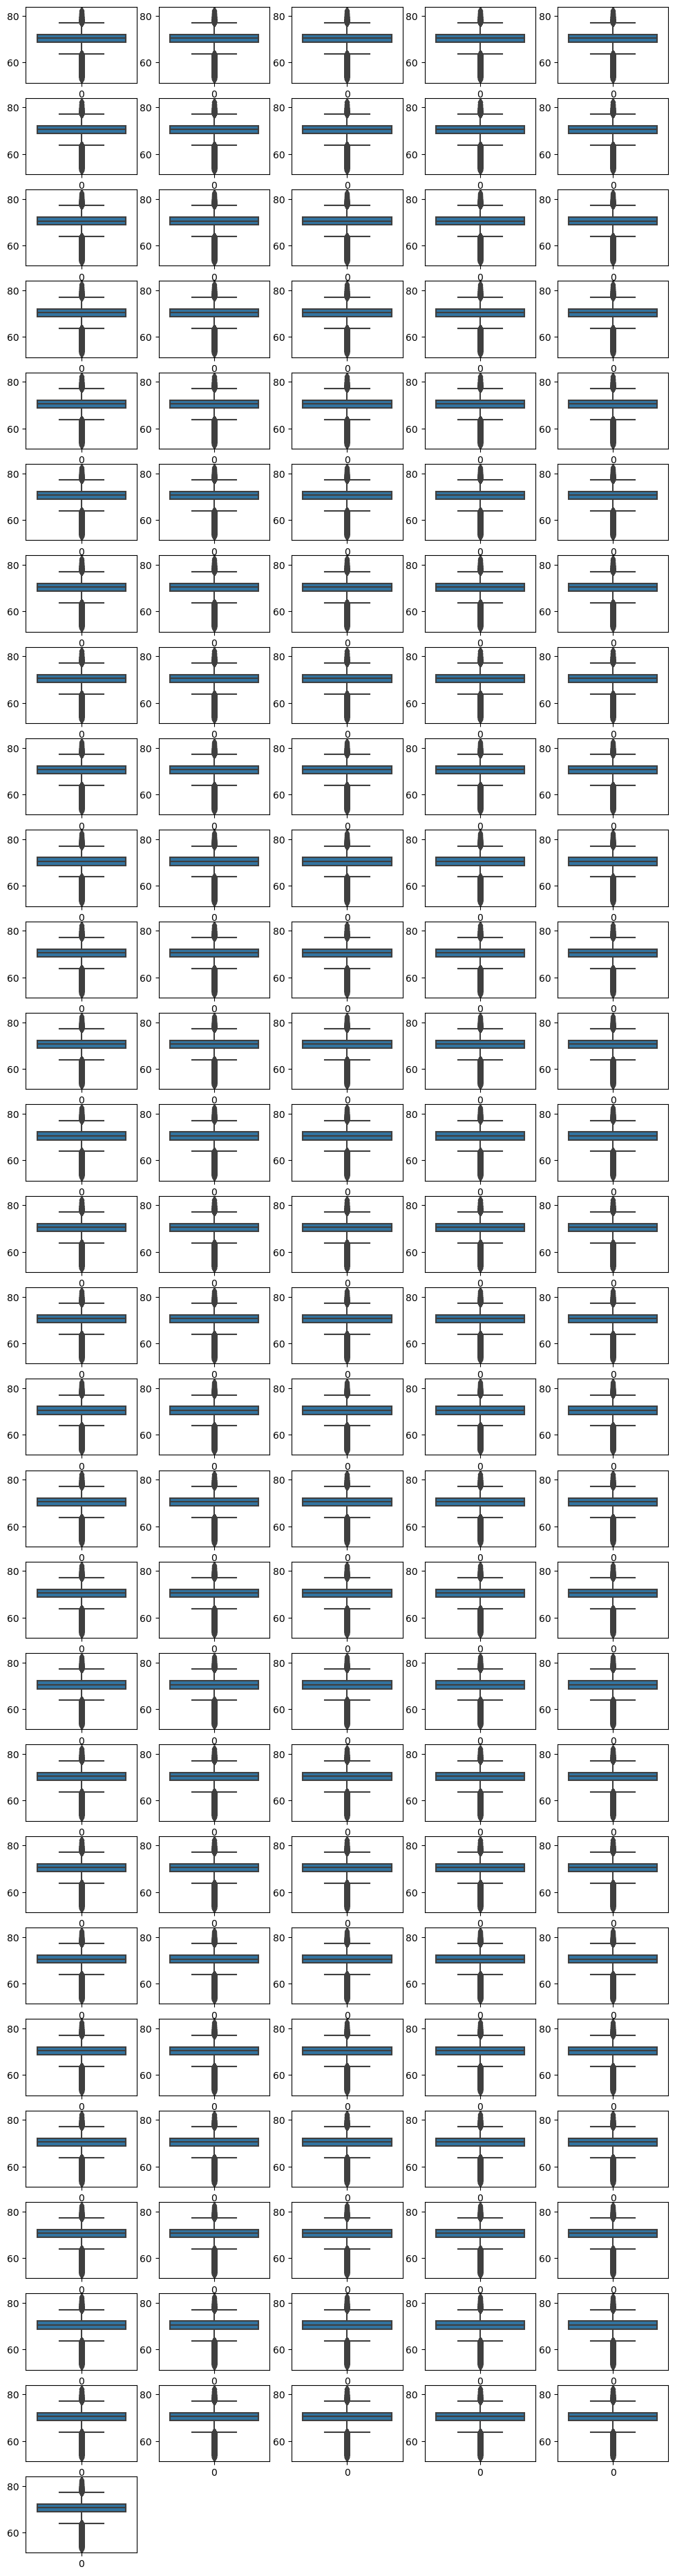

In [30]:
# 이상치 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['건조 1존 OP'])
    cnt += 1

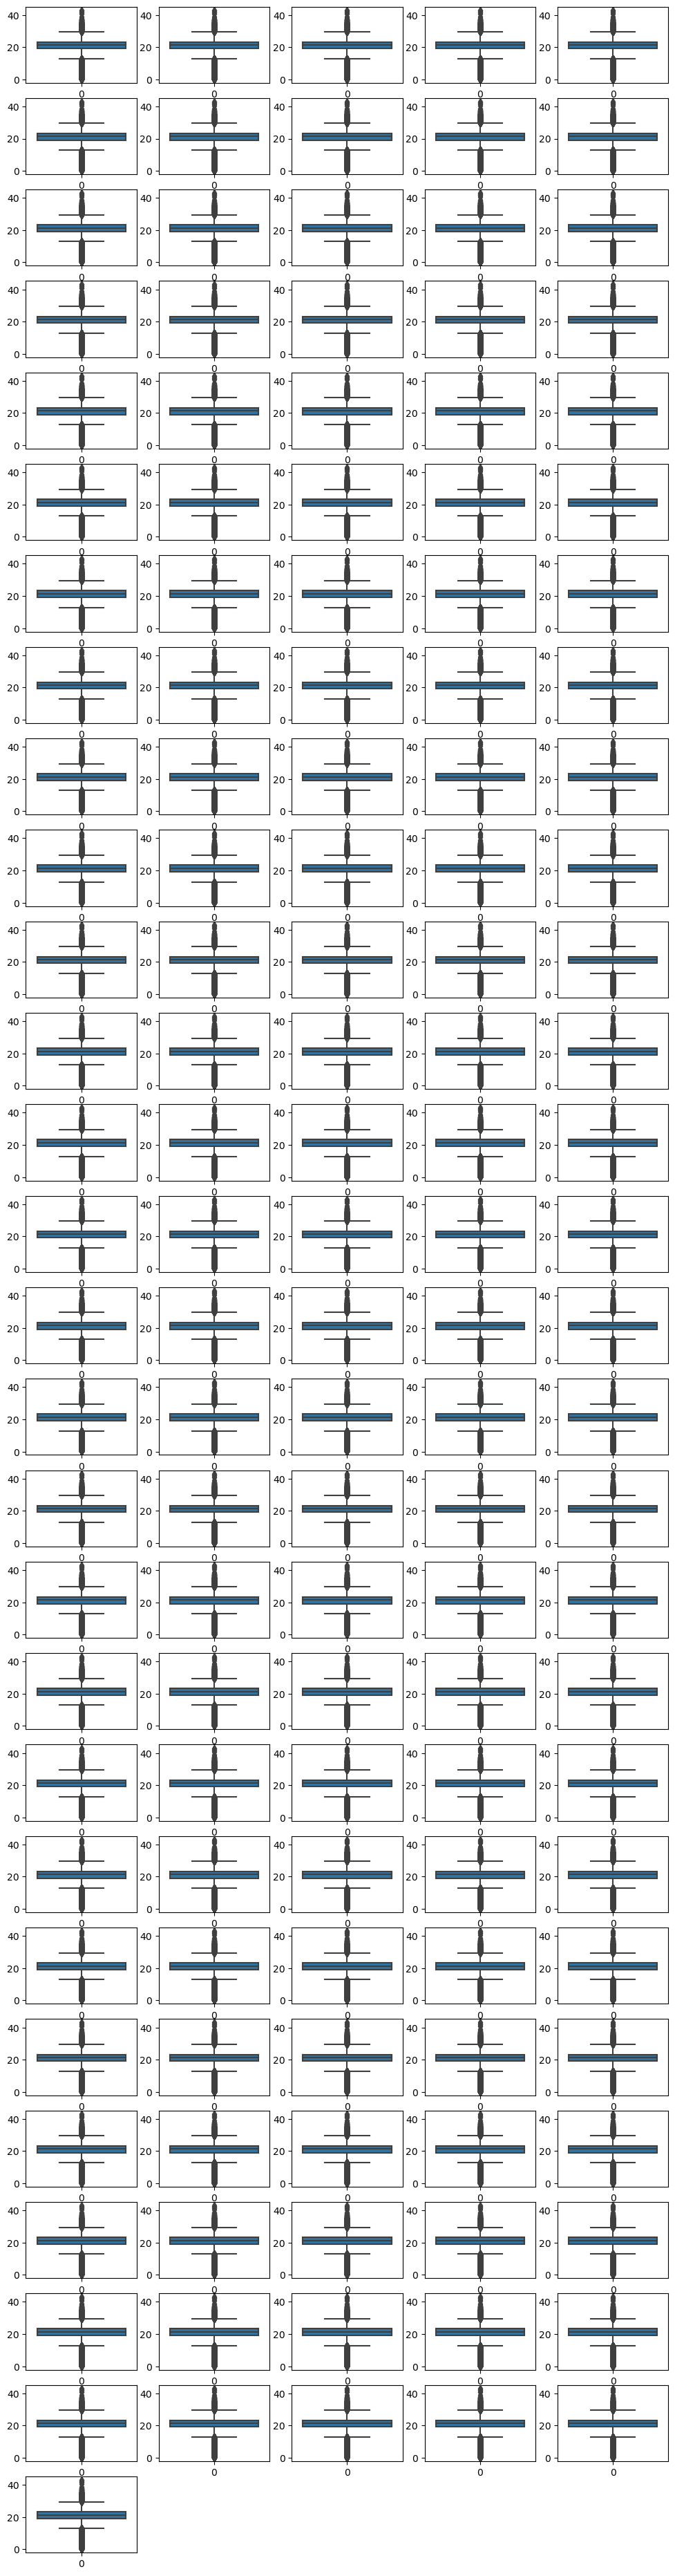

In [31]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['건조 2존 OP'])
    cnt += 1

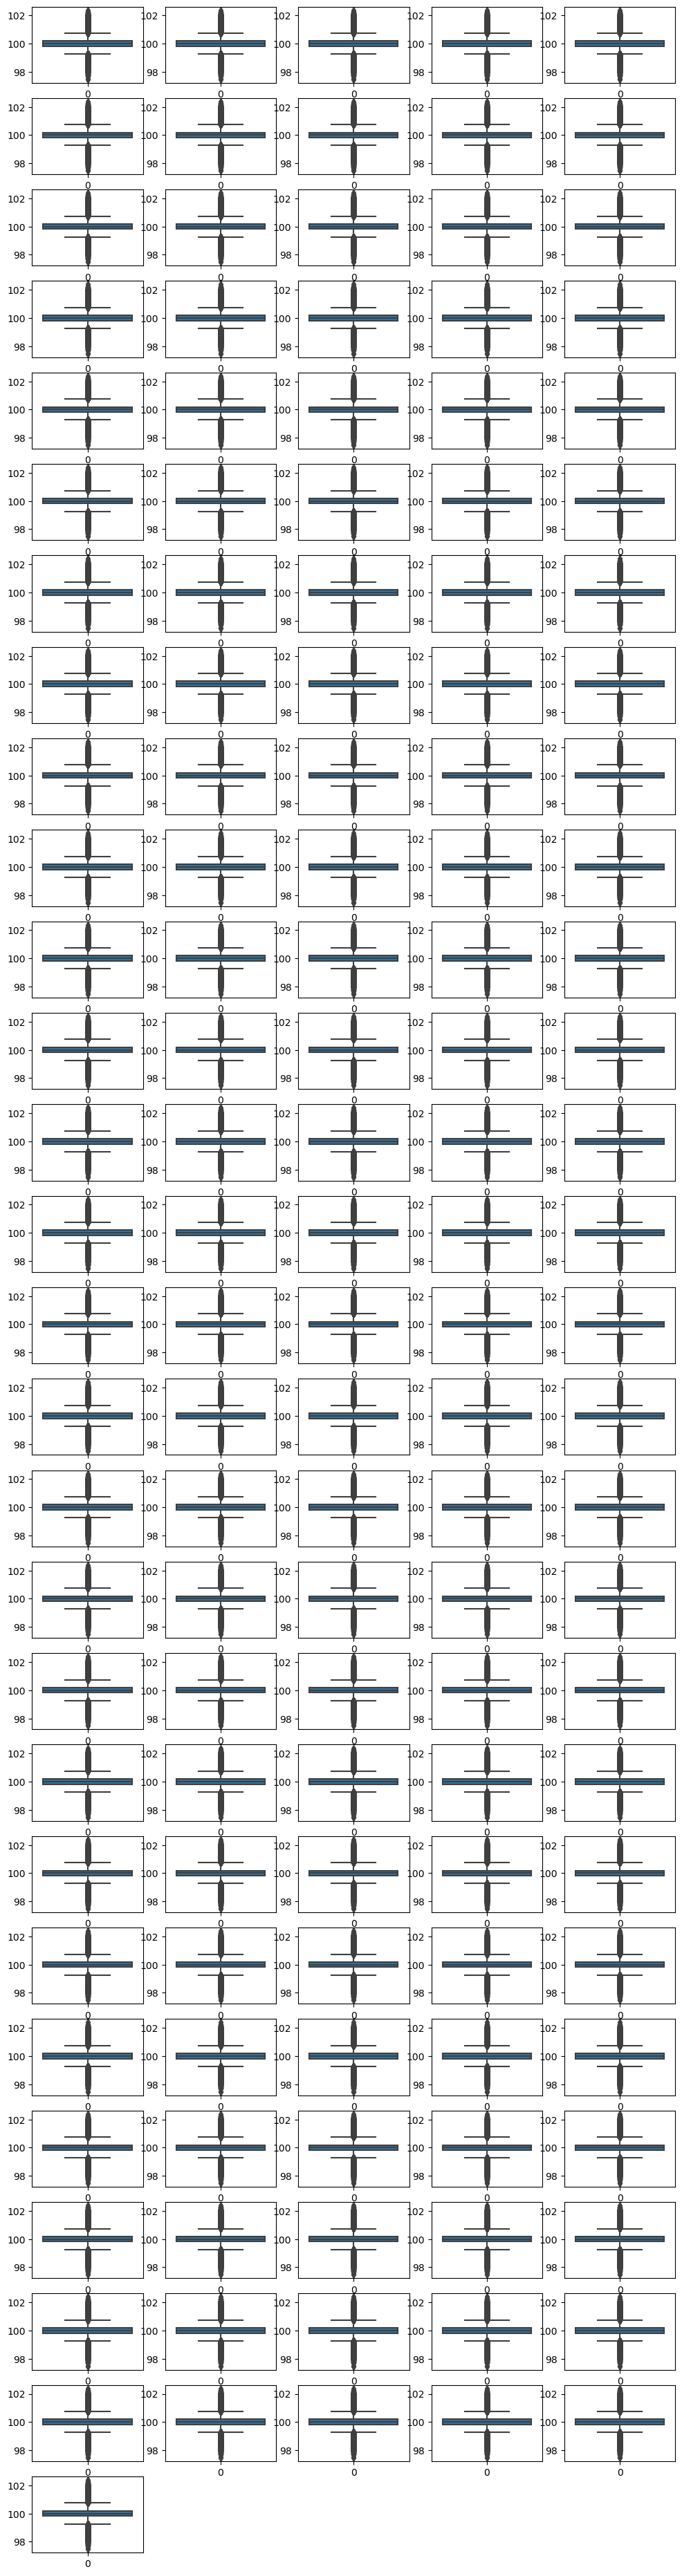

In [32]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['건조로 온도 1 Zone'])
    cnt += 1

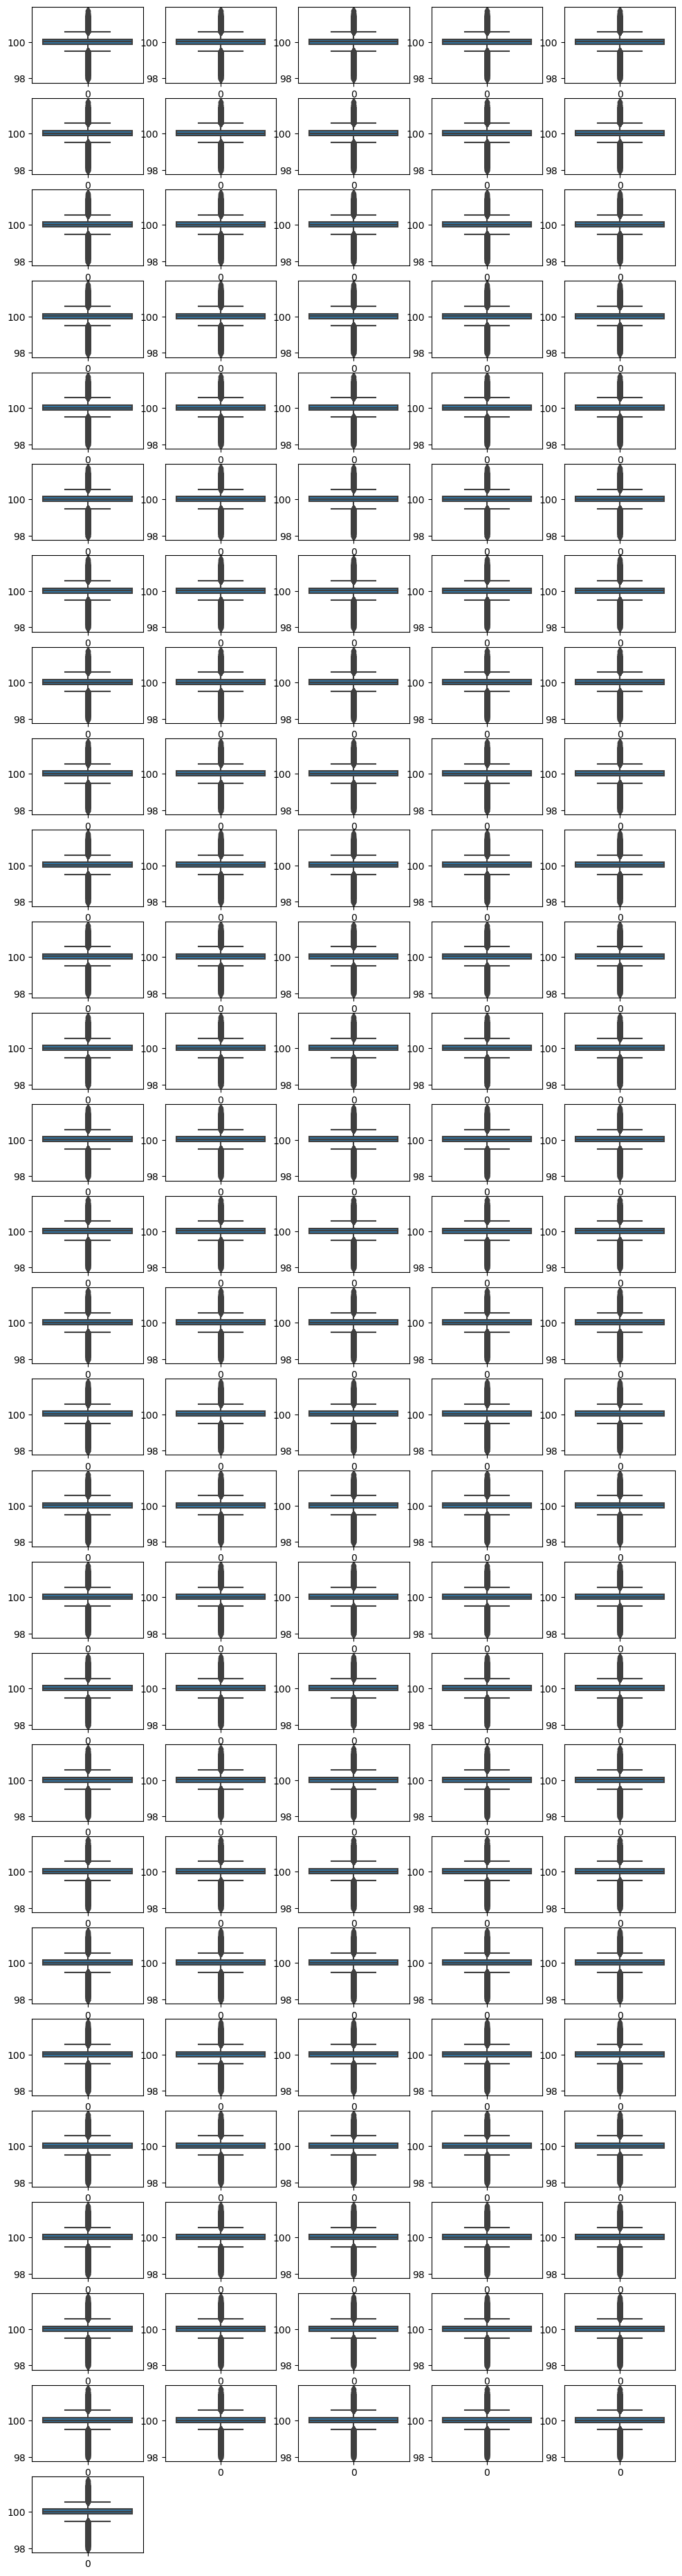

In [33]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['건조로 온도 2 Zone'])
    cnt += 1

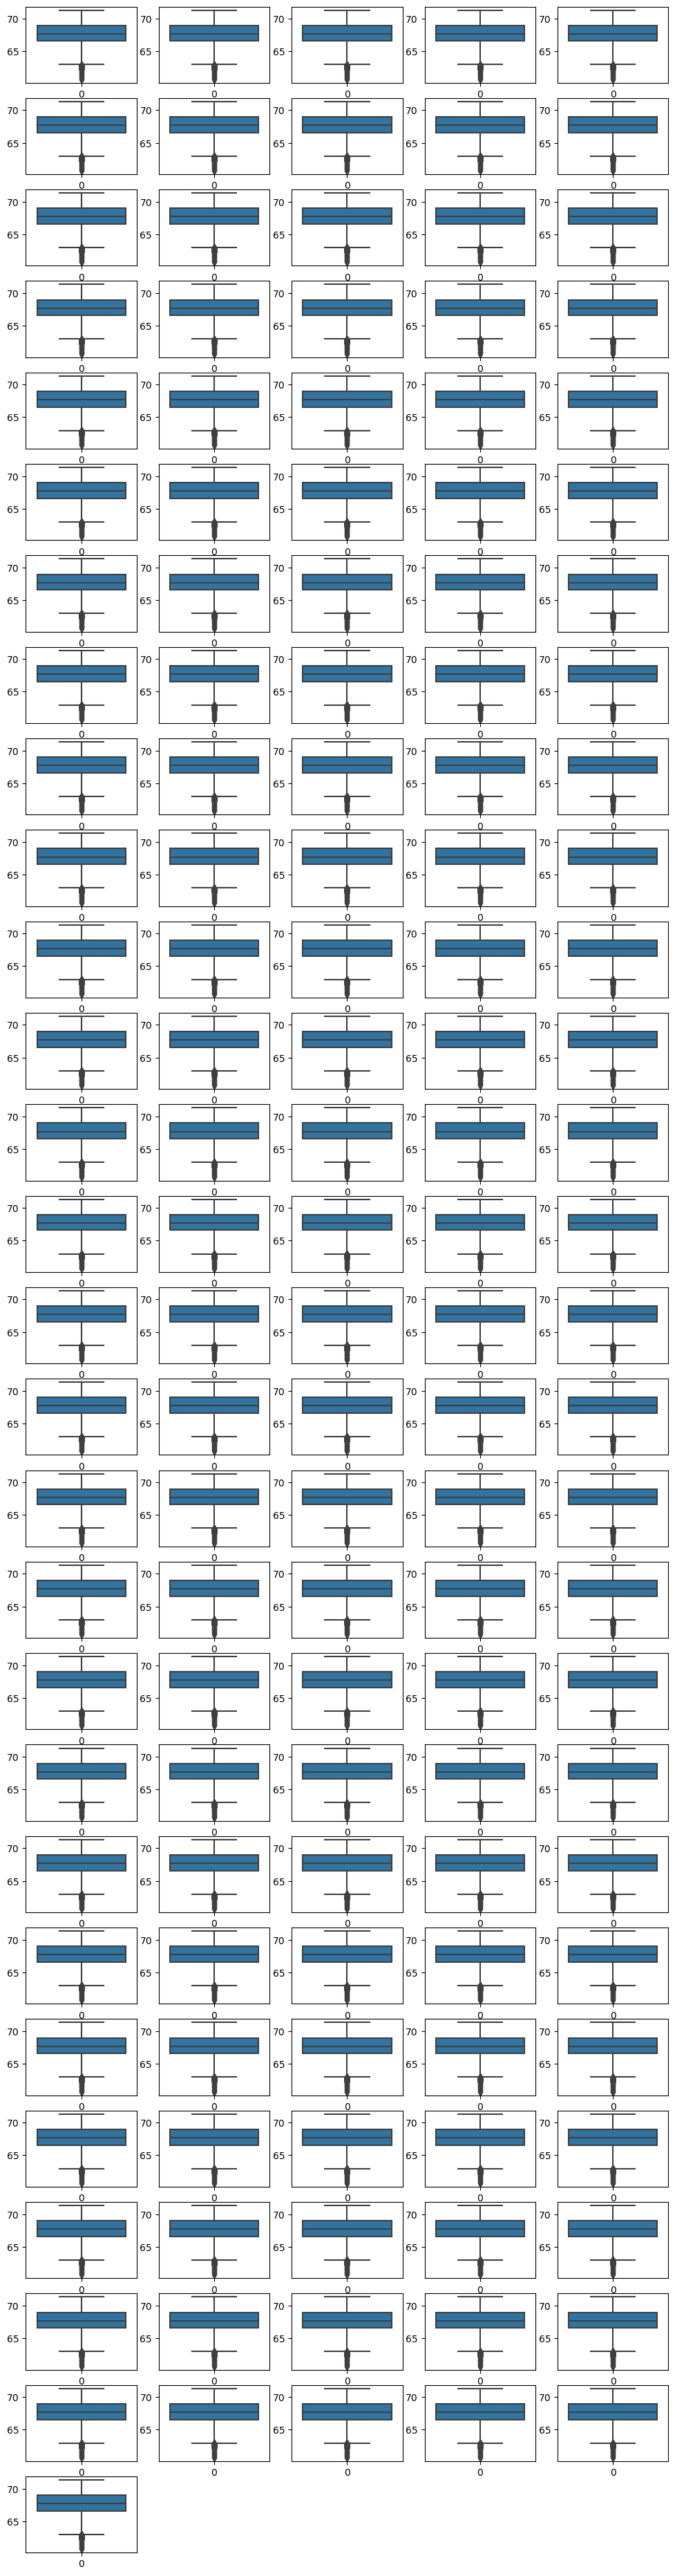

In [34]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['세정기'])
    cnt += 1

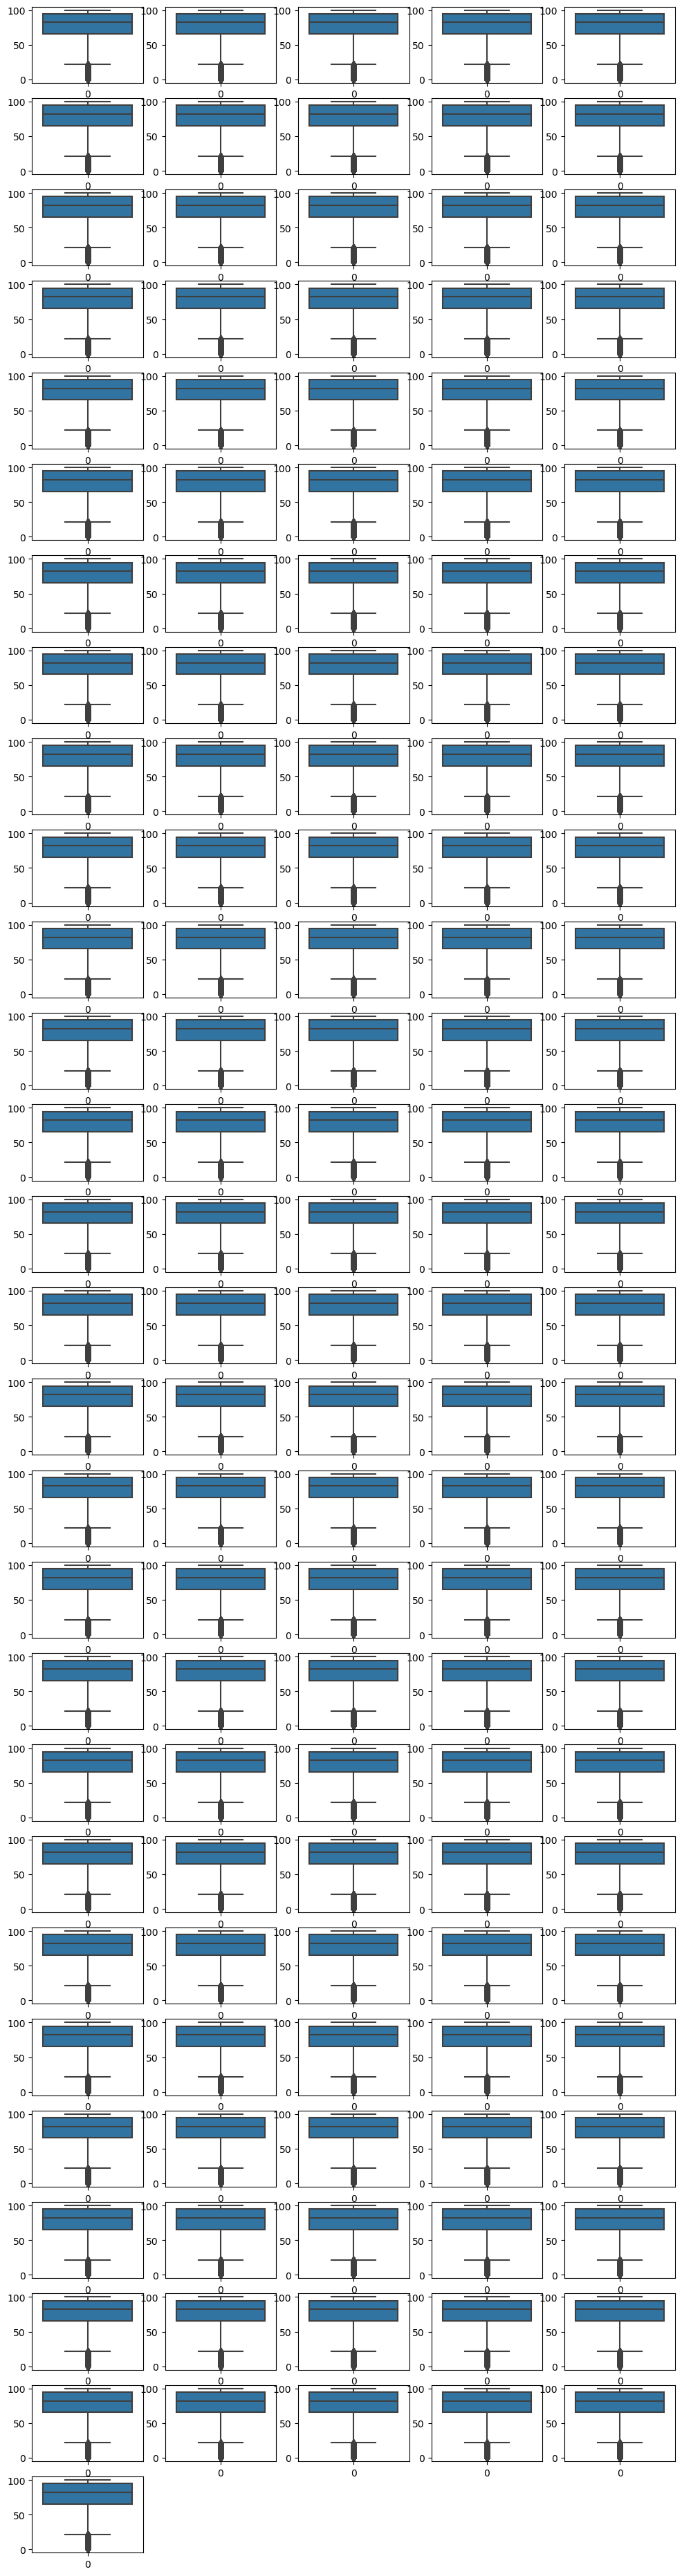

In [35]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입1존 OP'])
    cnt += 1

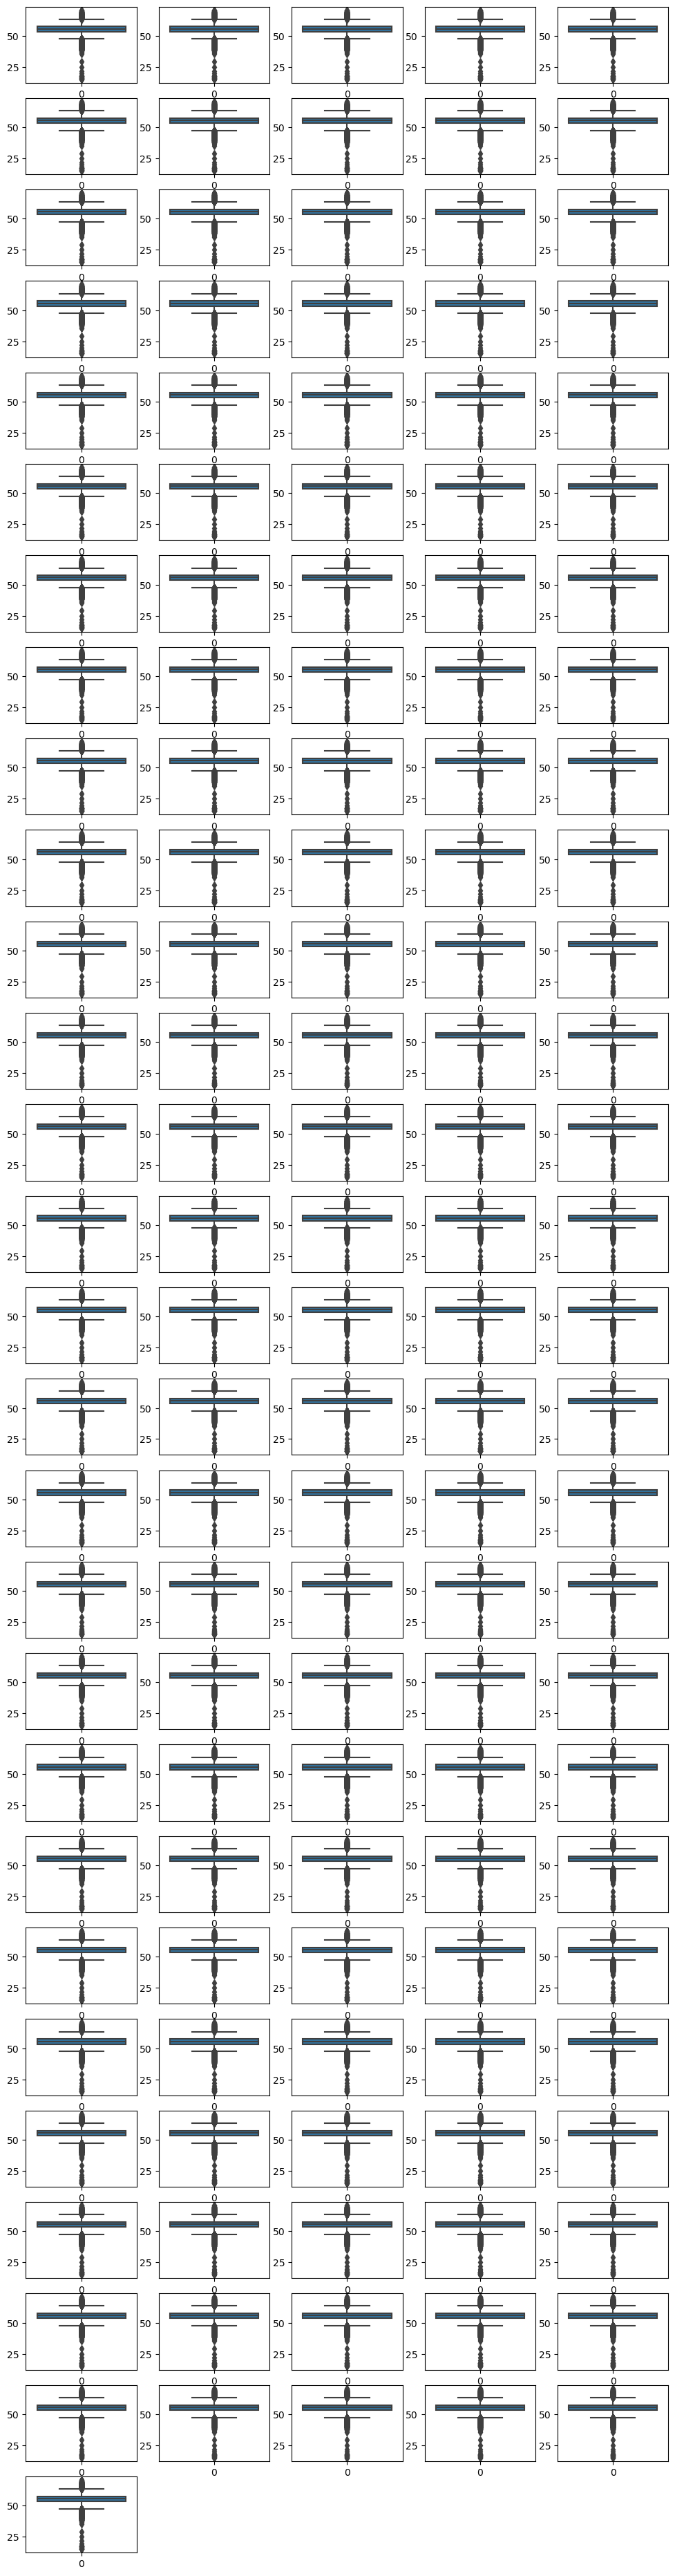

In [36]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입2존 OP'])
    cnt += 1

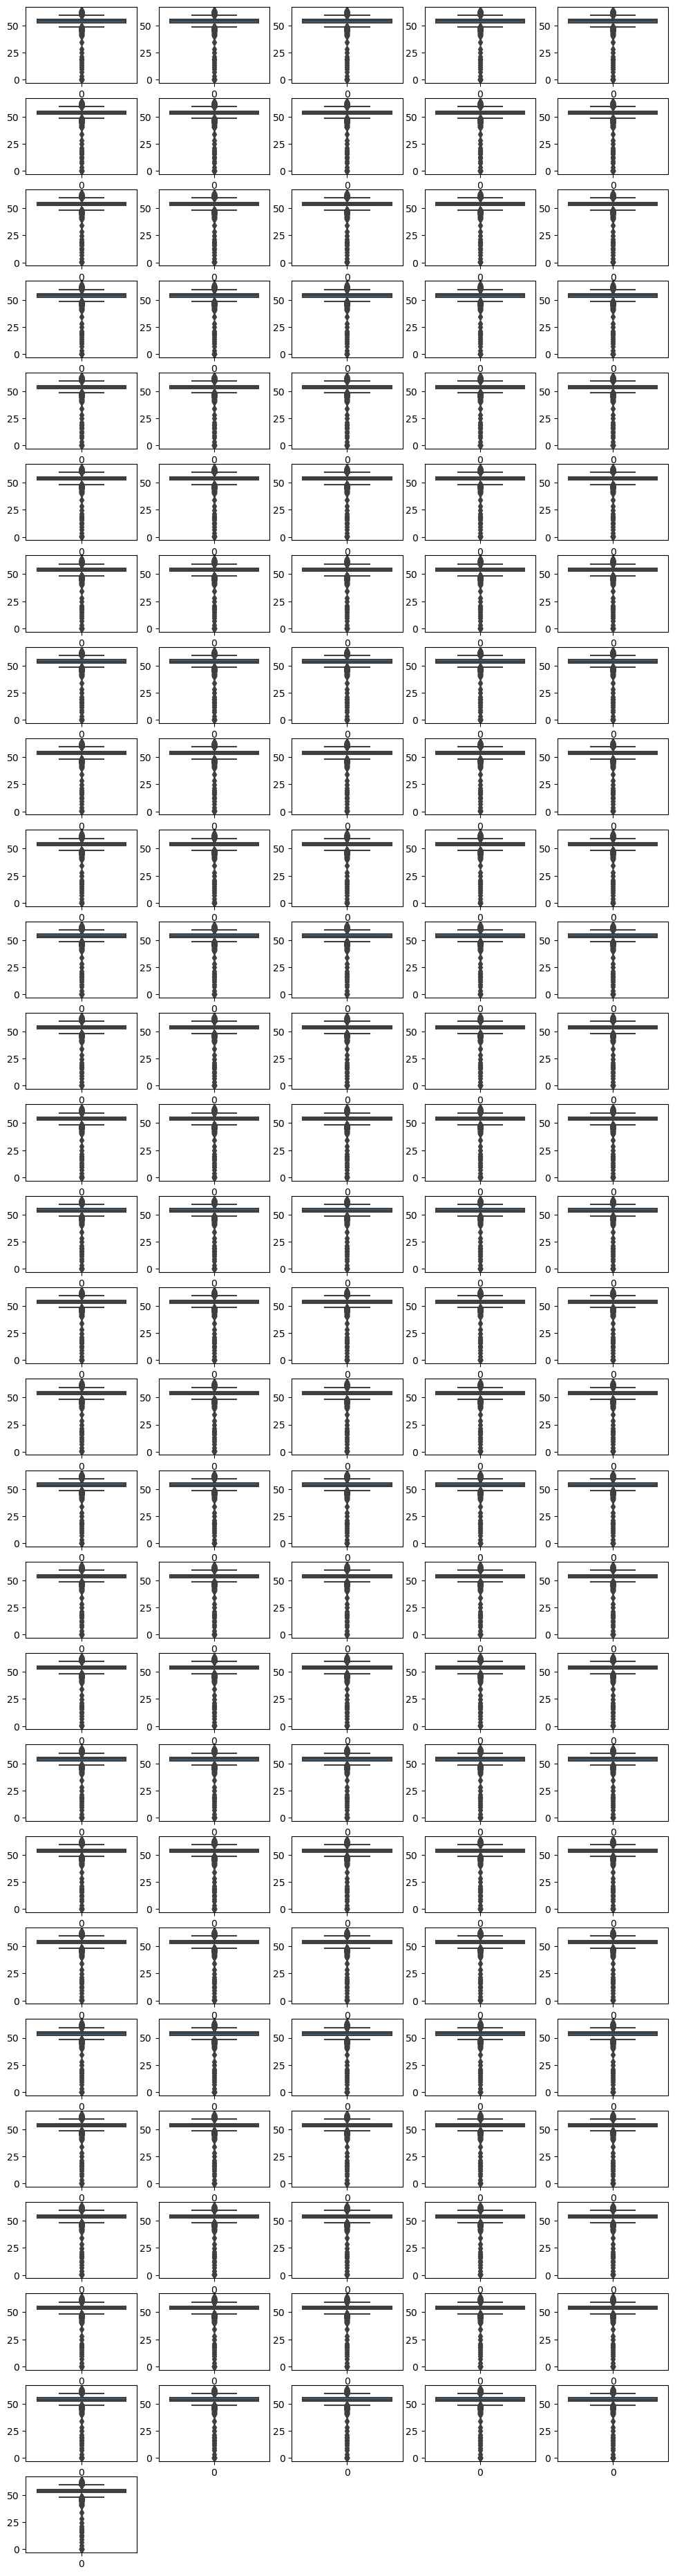

In [37]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입3존 OP'])
    cnt += 1

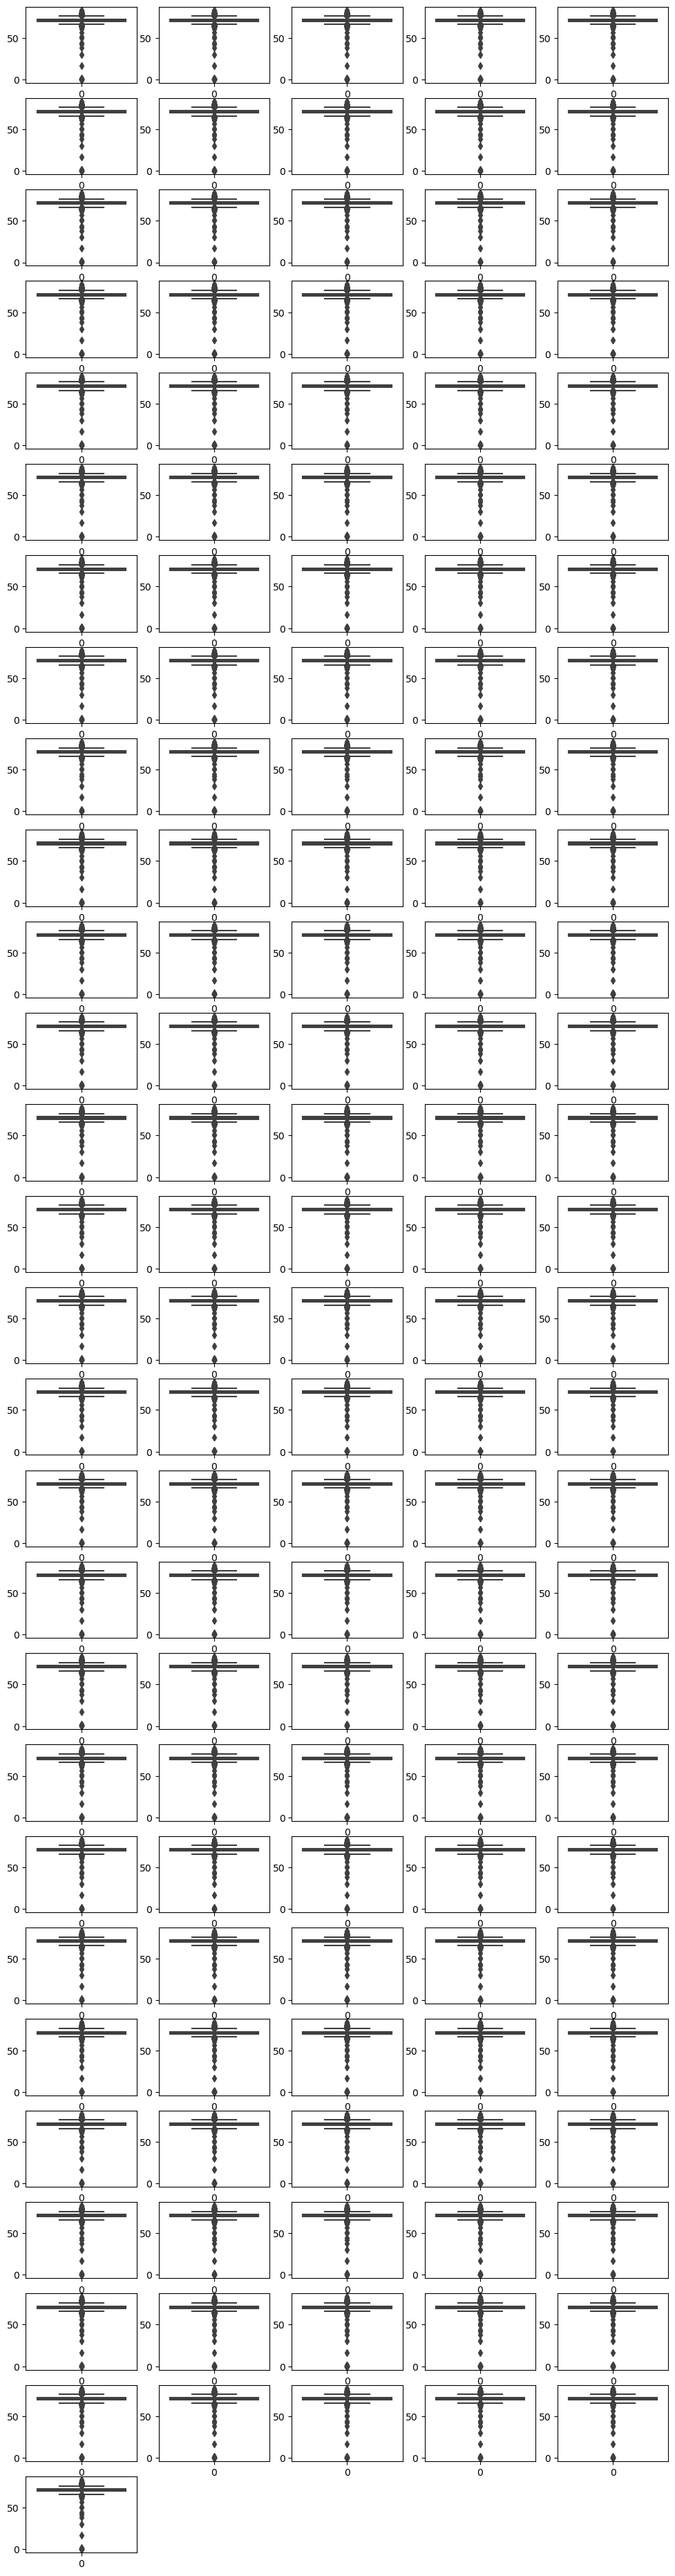

In [38]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입4존 OP'])
    cnt += 1

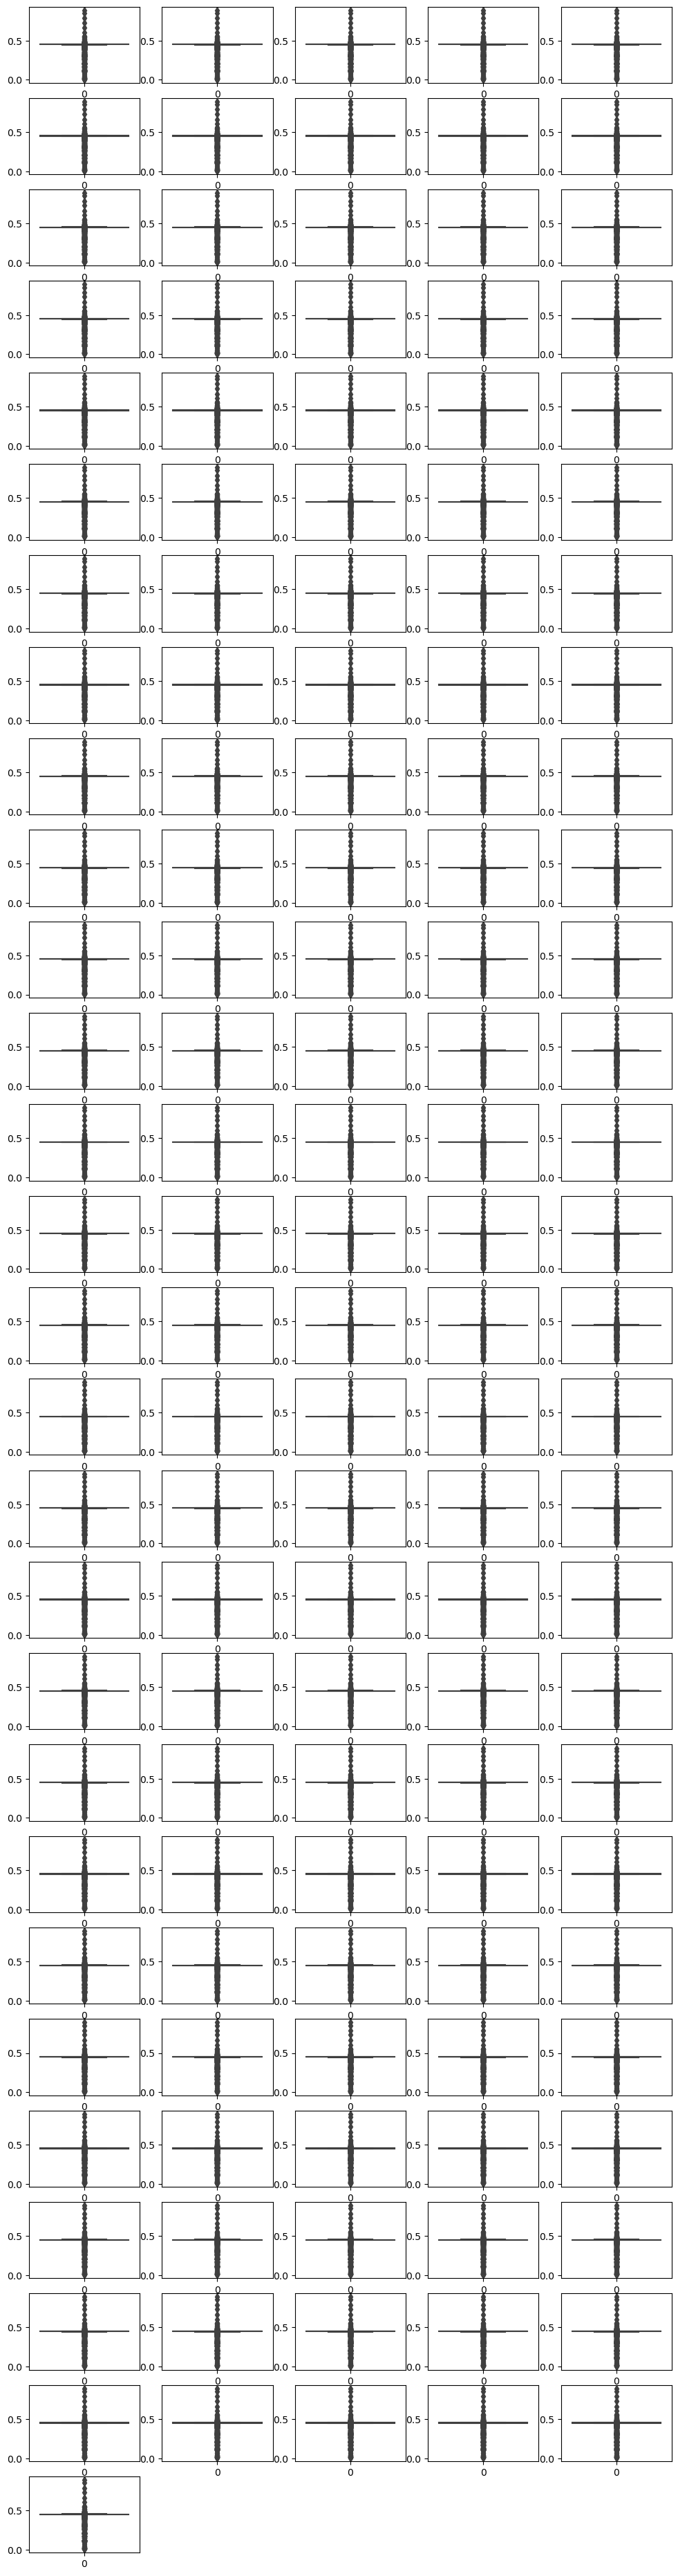

In [39]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입로 CP 값'])
    cnt += 1

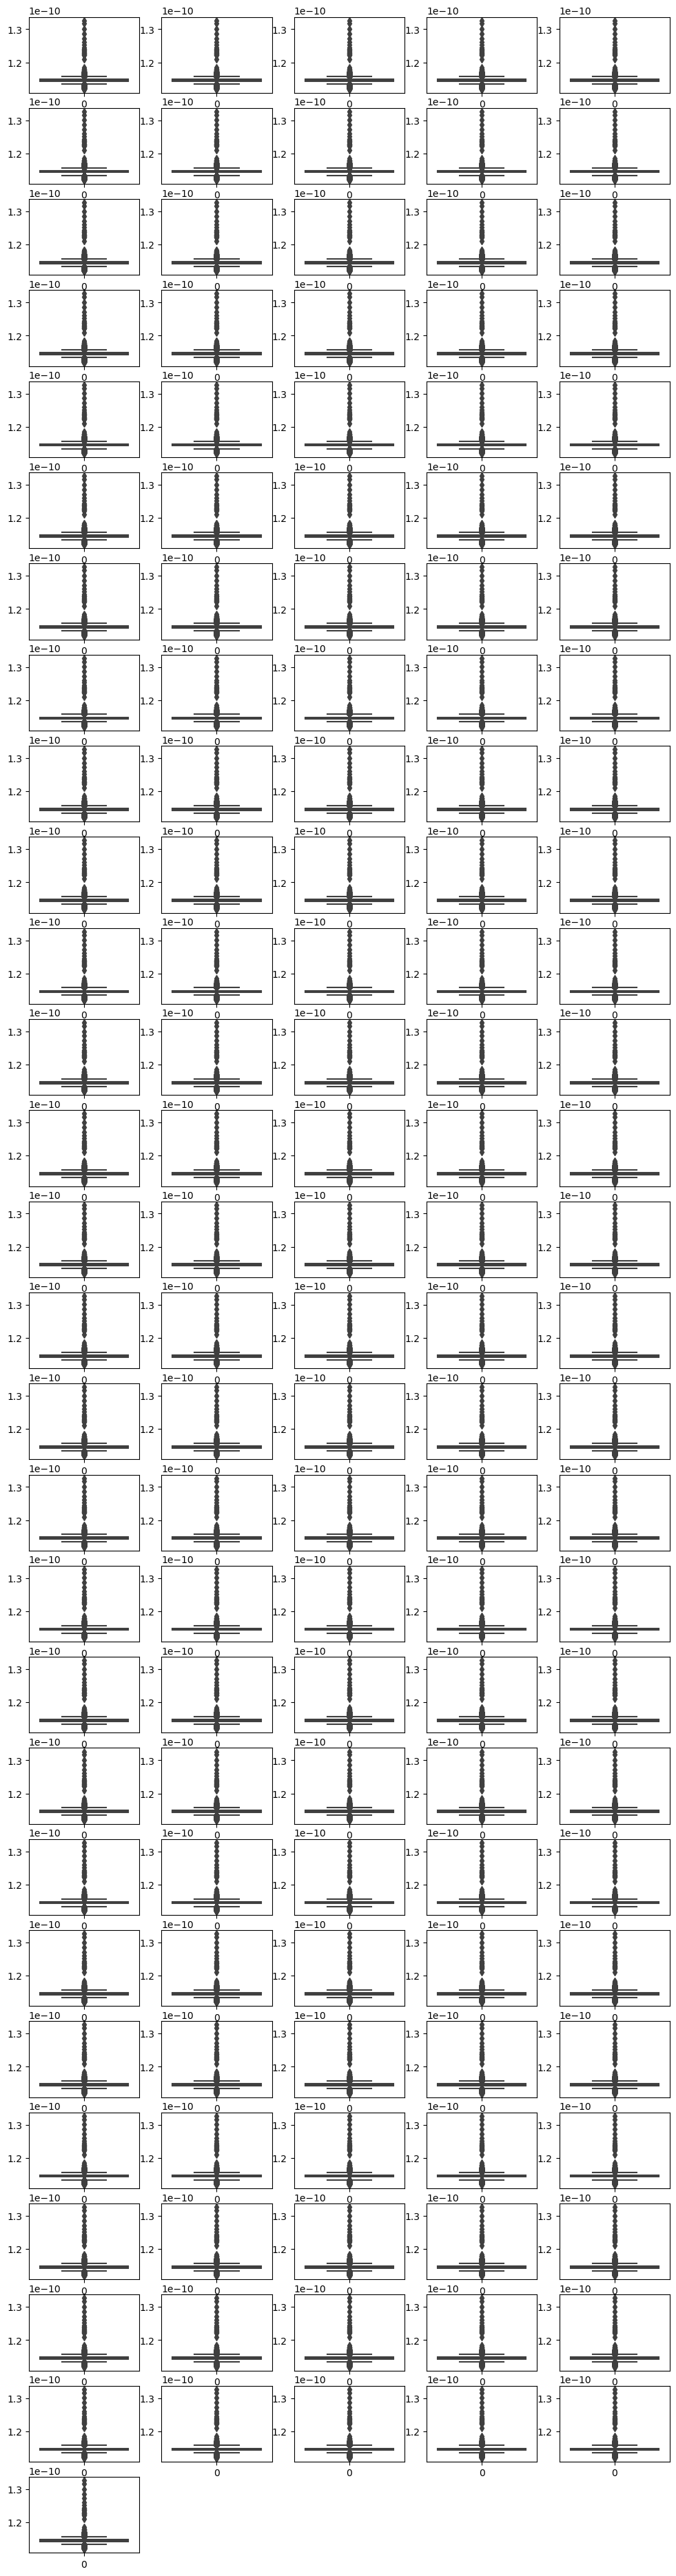

In [40]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입로 CP 모니터 값'])
    cnt += 1

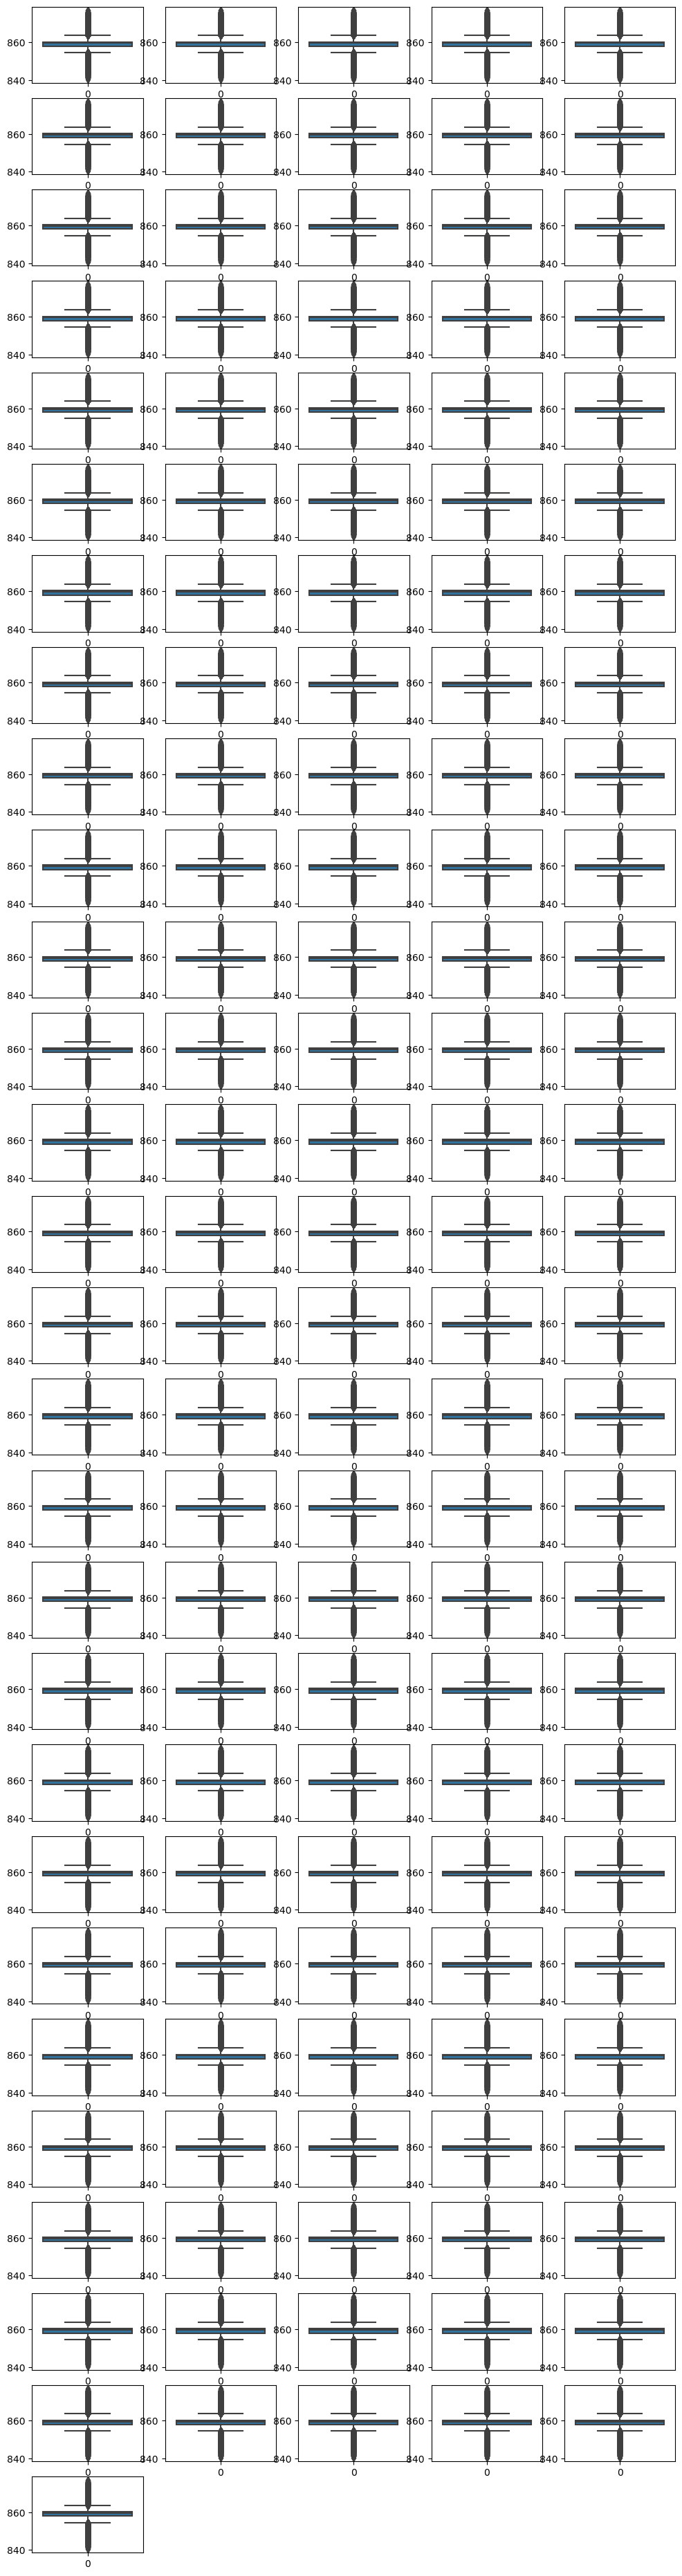

In [41]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입로 온도 1 Zone'])
    cnt += 1

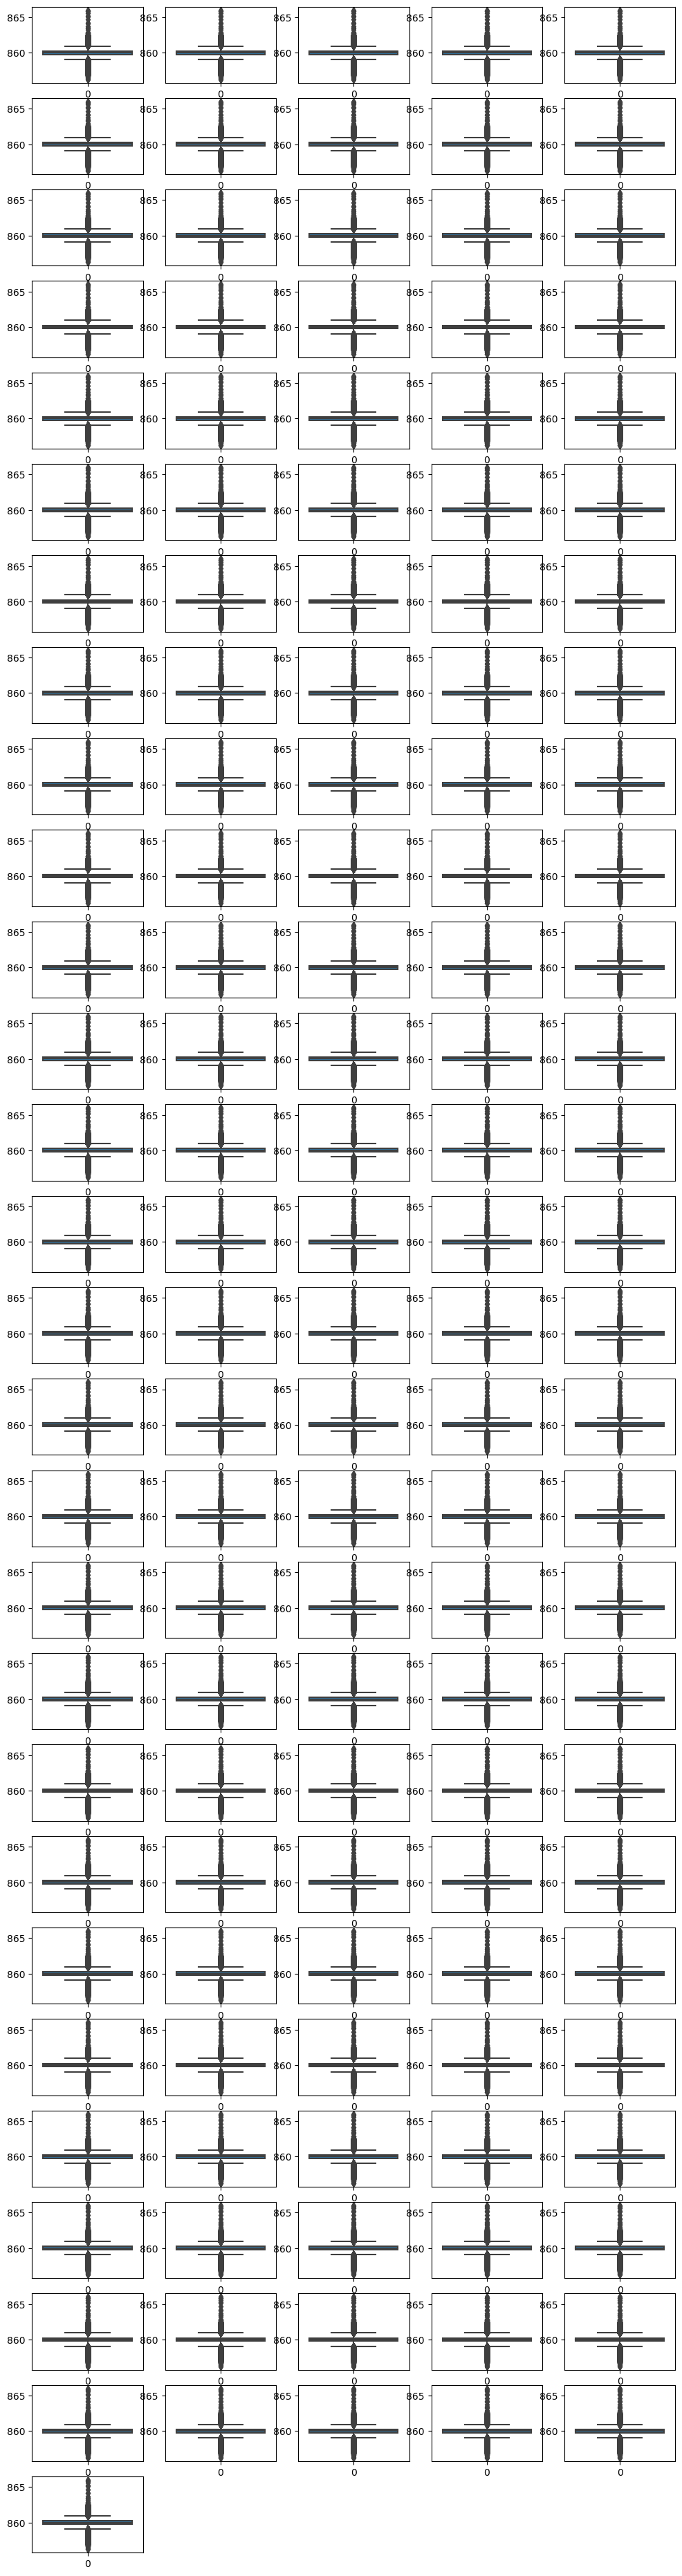

In [42]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입로 온도 2 Zone'])
    cnt += 1

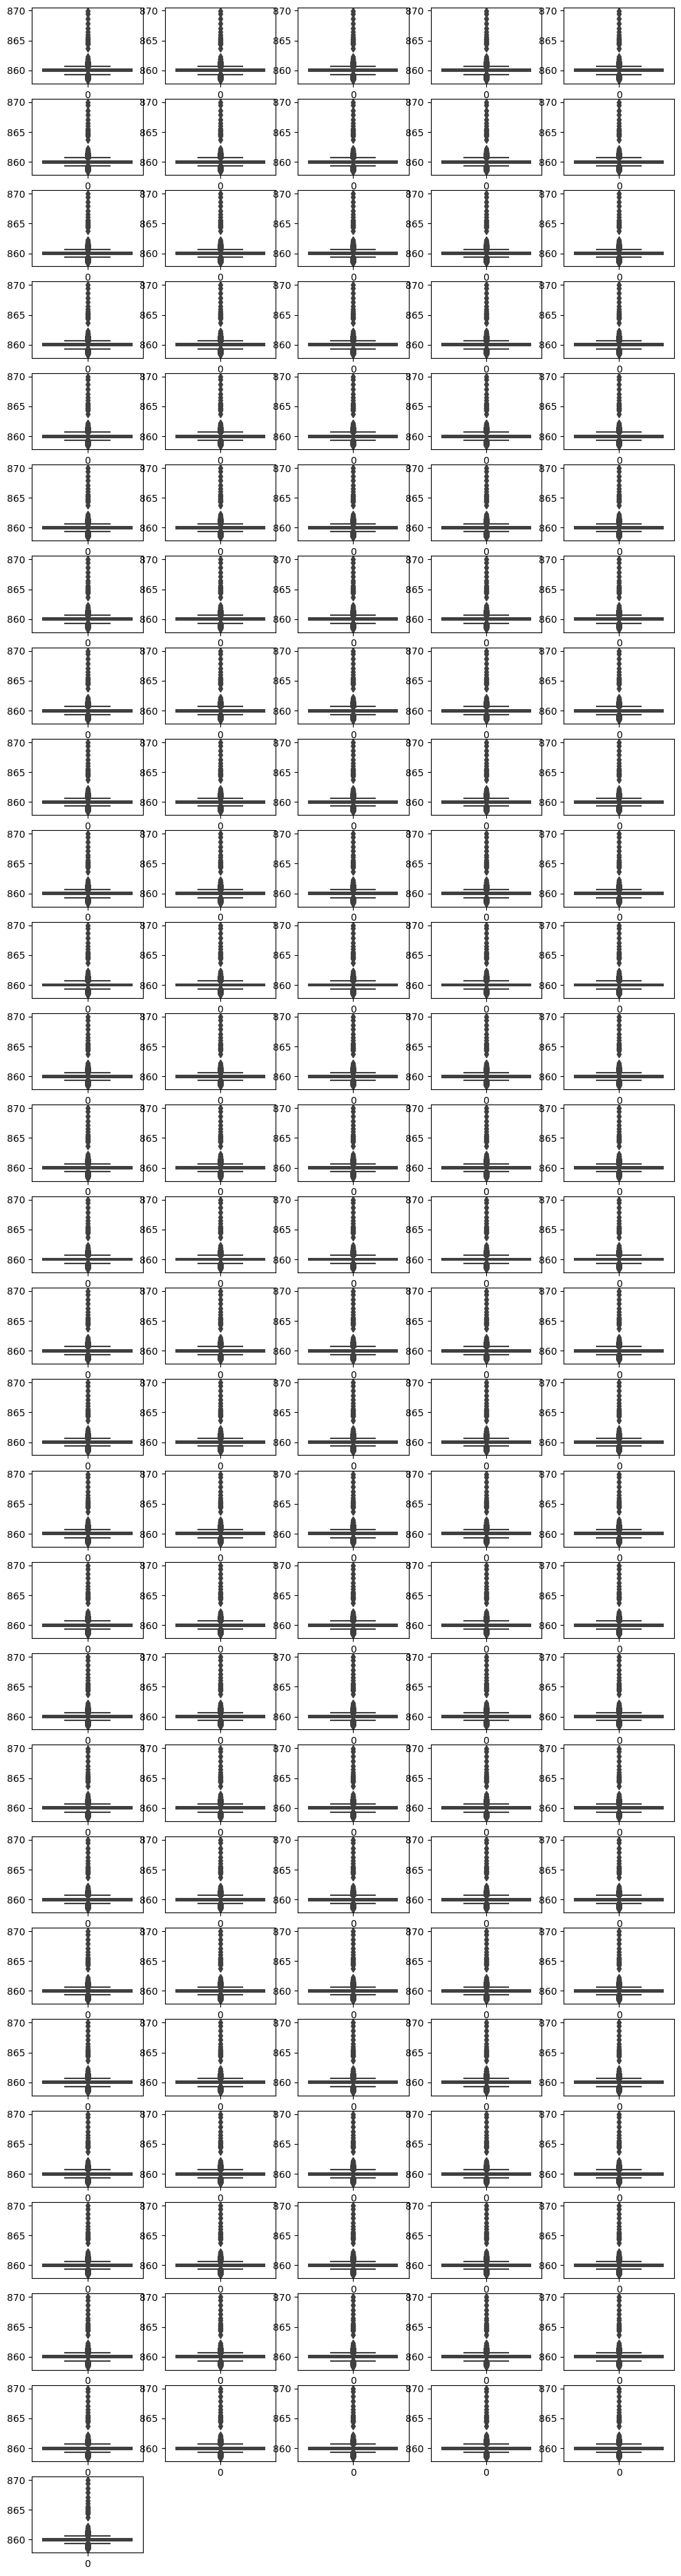

In [43]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입로 온도 3 Zone'])
    cnt += 1

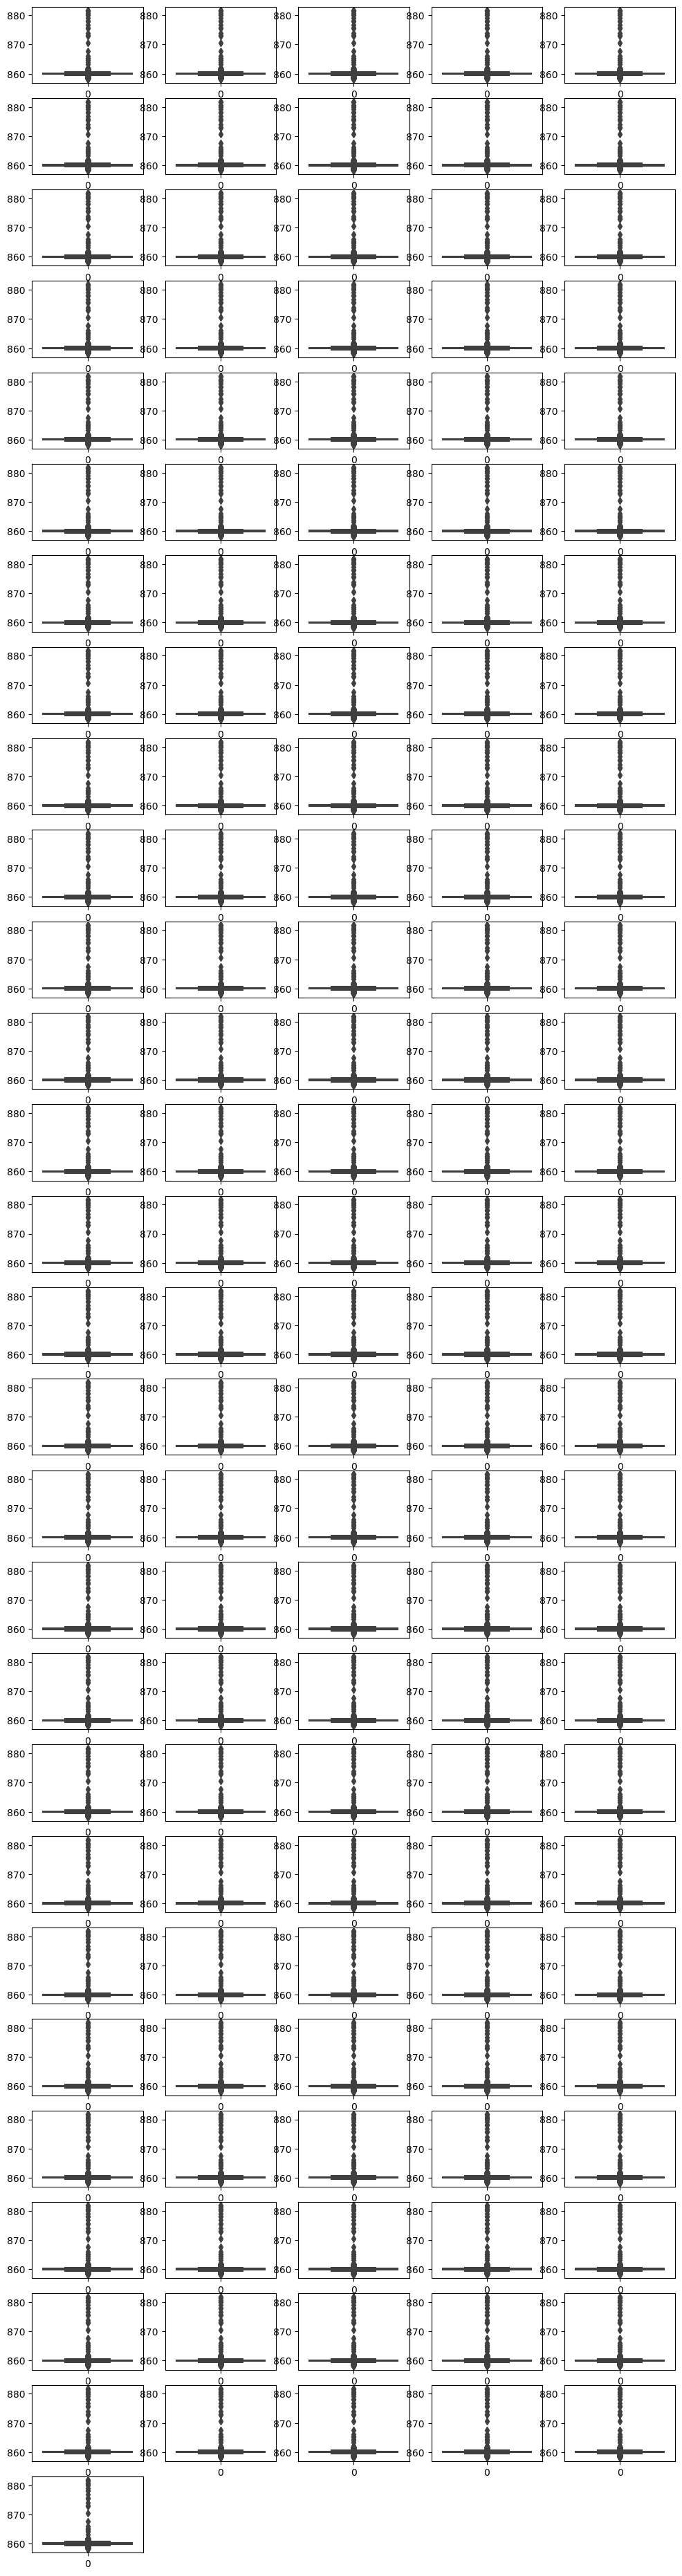

In [44]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['소입로 온도 4 Zone'])
    cnt += 1

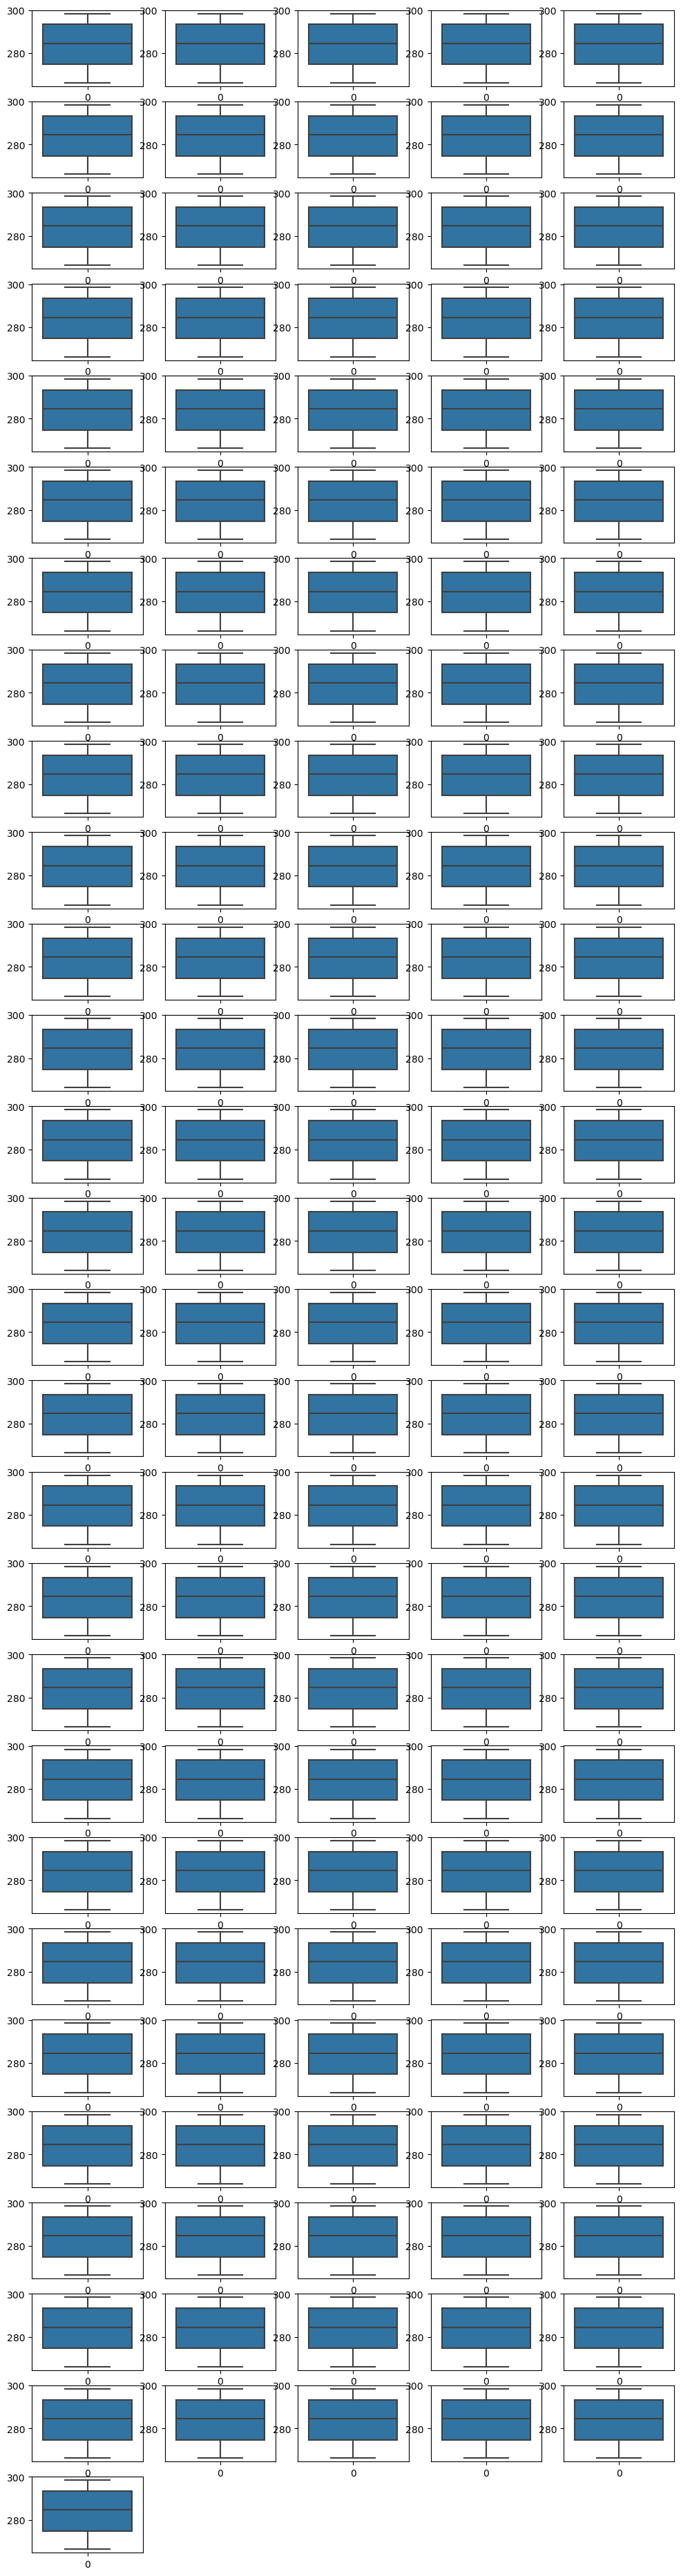

In [45]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['솔트 컨베이어 온도 1 Zone'])
    cnt += 1

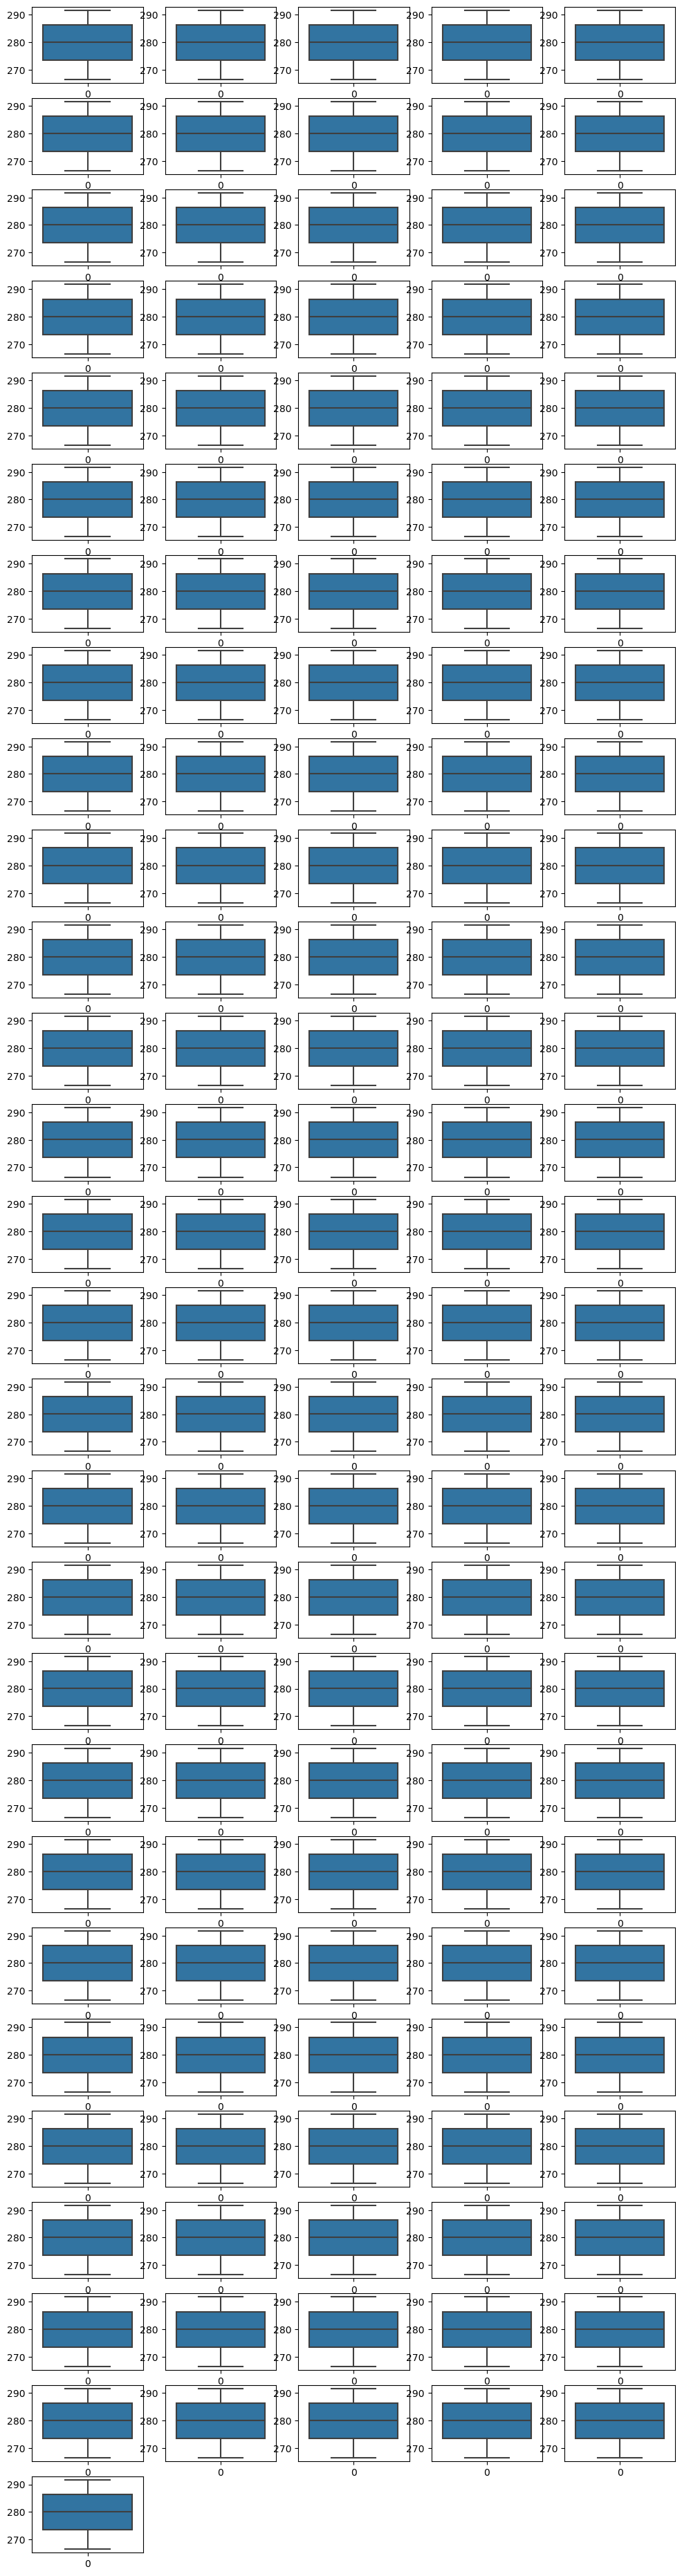

In [46]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['솔트 컨베이어 온도 2 Zone'])
    cnt += 1

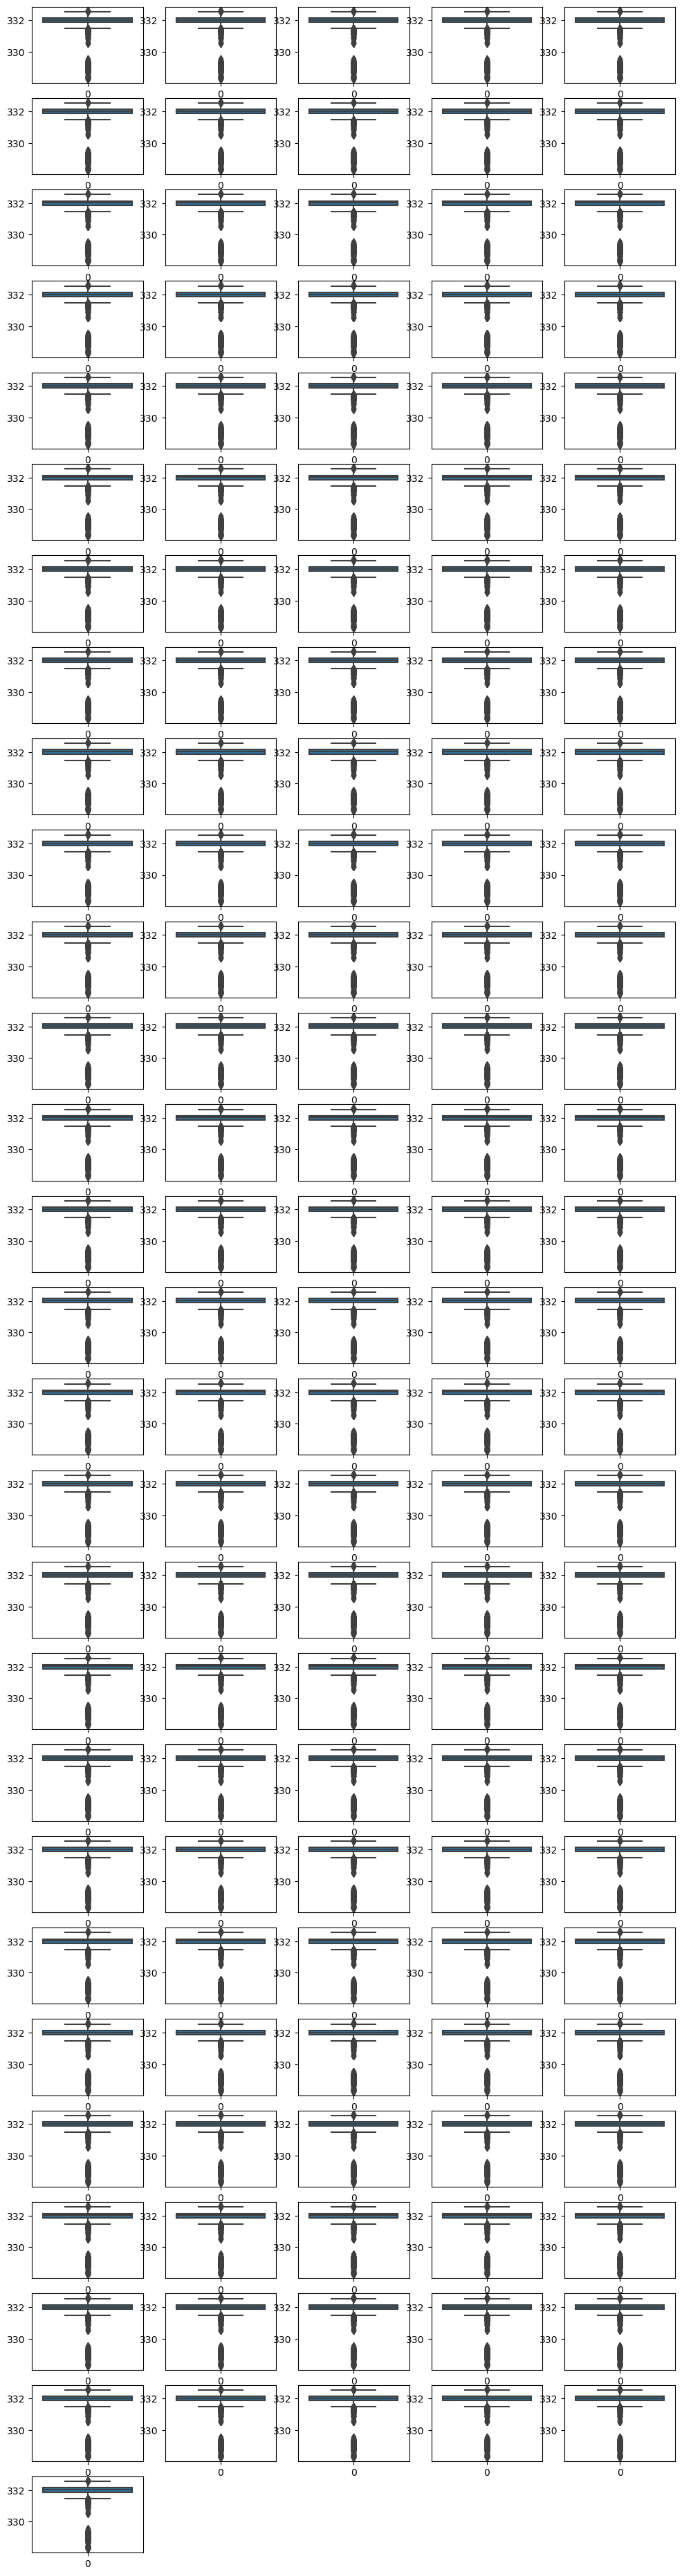

In [47]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['솔트조 온도 1 Zone'])
    cnt += 1

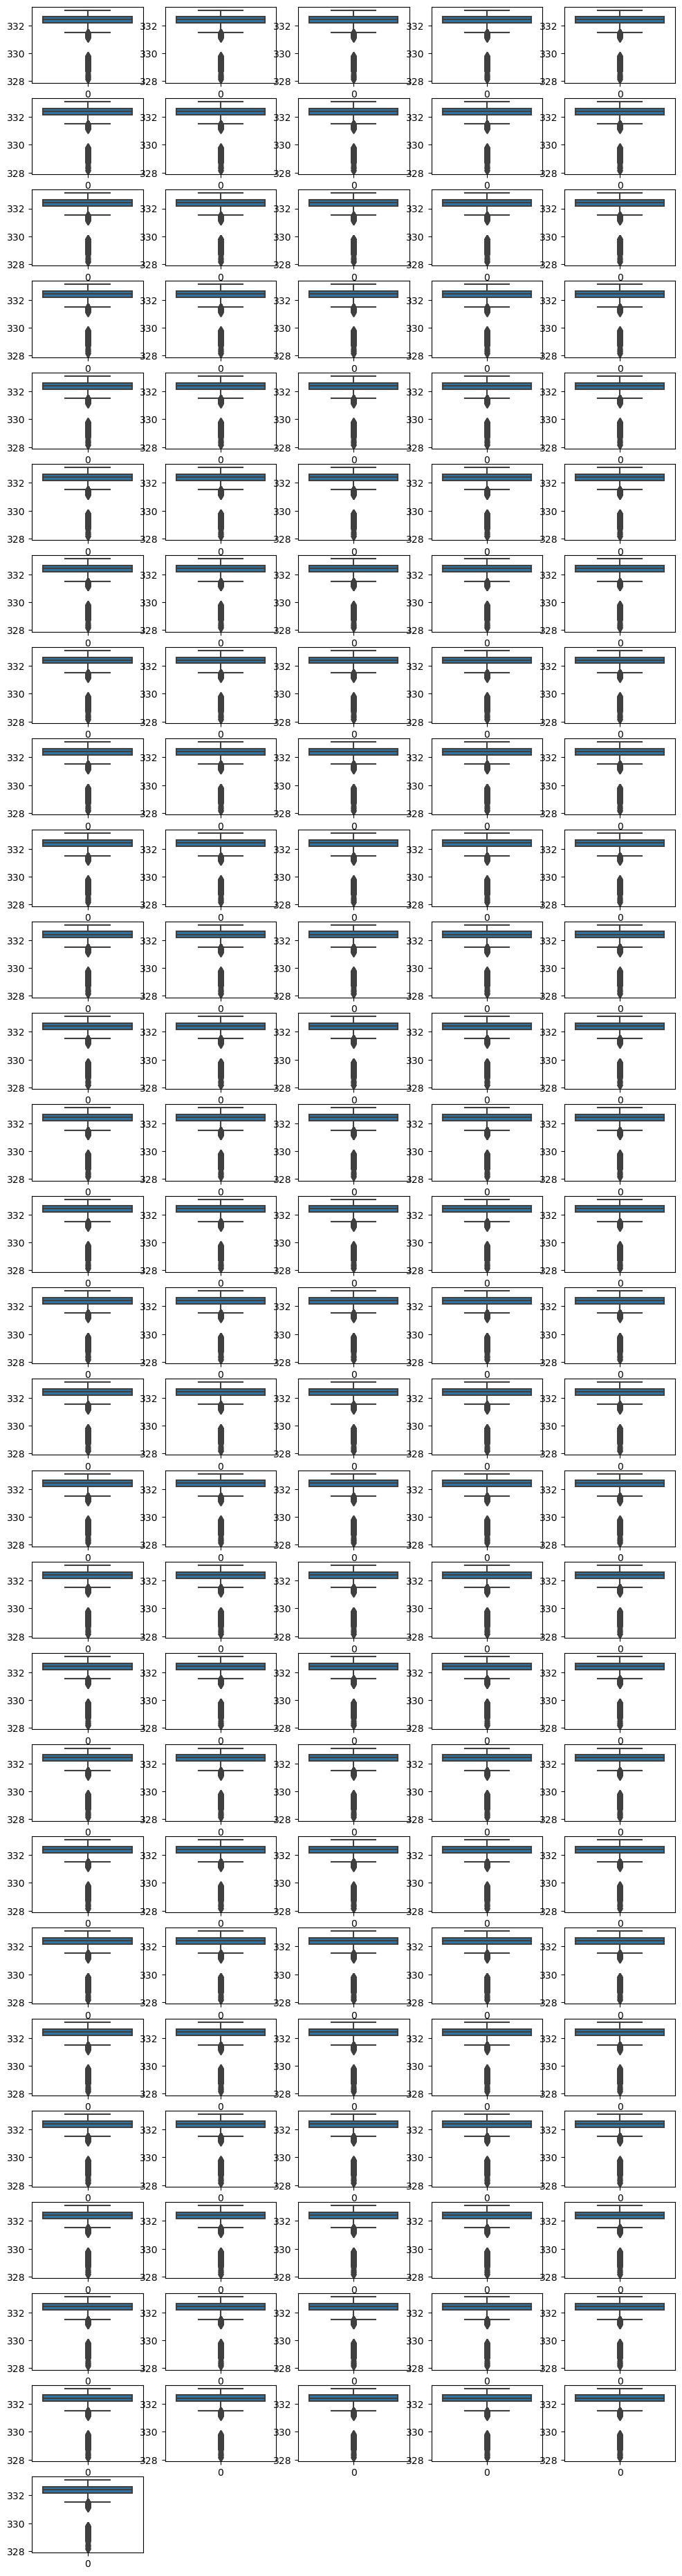

In [48]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['솔트조 온도 2 Zone'])
    cnt += 1

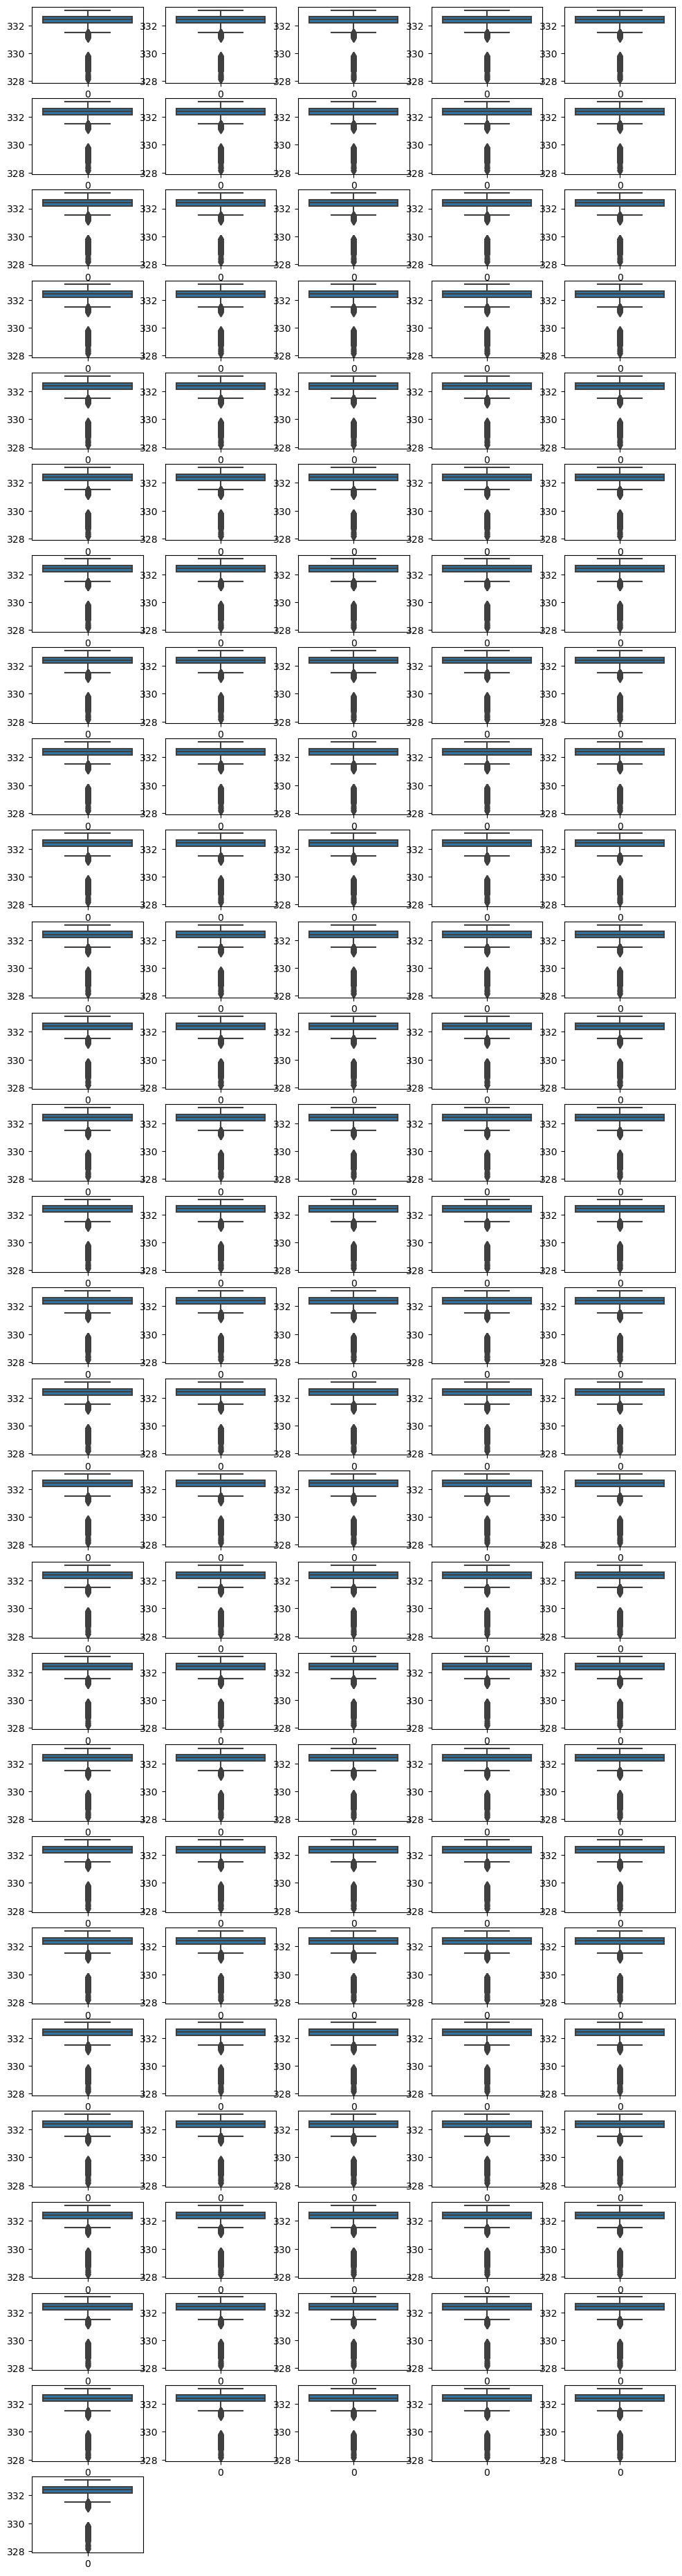

In [49]:
plt.figure(figsize = (12, 120))
cnt = 1
for i in df_minute['배정번호'].unique():
    plt.subplot(70, 5, cnt)
    sns.boxplot(data = df_minute['솔트조 온도 2 Zone'])
    cnt += 1

In [51]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

def matplotlib_font_korean(font_path = 'C:\\Windows\\Fonts\\malgun.ttf'):
    """
    matplotlib에서 이미지를 띄울 때, 
    한글이 깨지는 현상을 바로잡아줍니다.
    맑은 고딕 폰트가 있는 경로와 파일명을 지정하면 되며,
    default는 "C:/Windows/Fonts/malgun.ttf" 입니다.
    """
    from matplotlib import font_manager, rc

    font = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font)

matplotlib_font_korean()

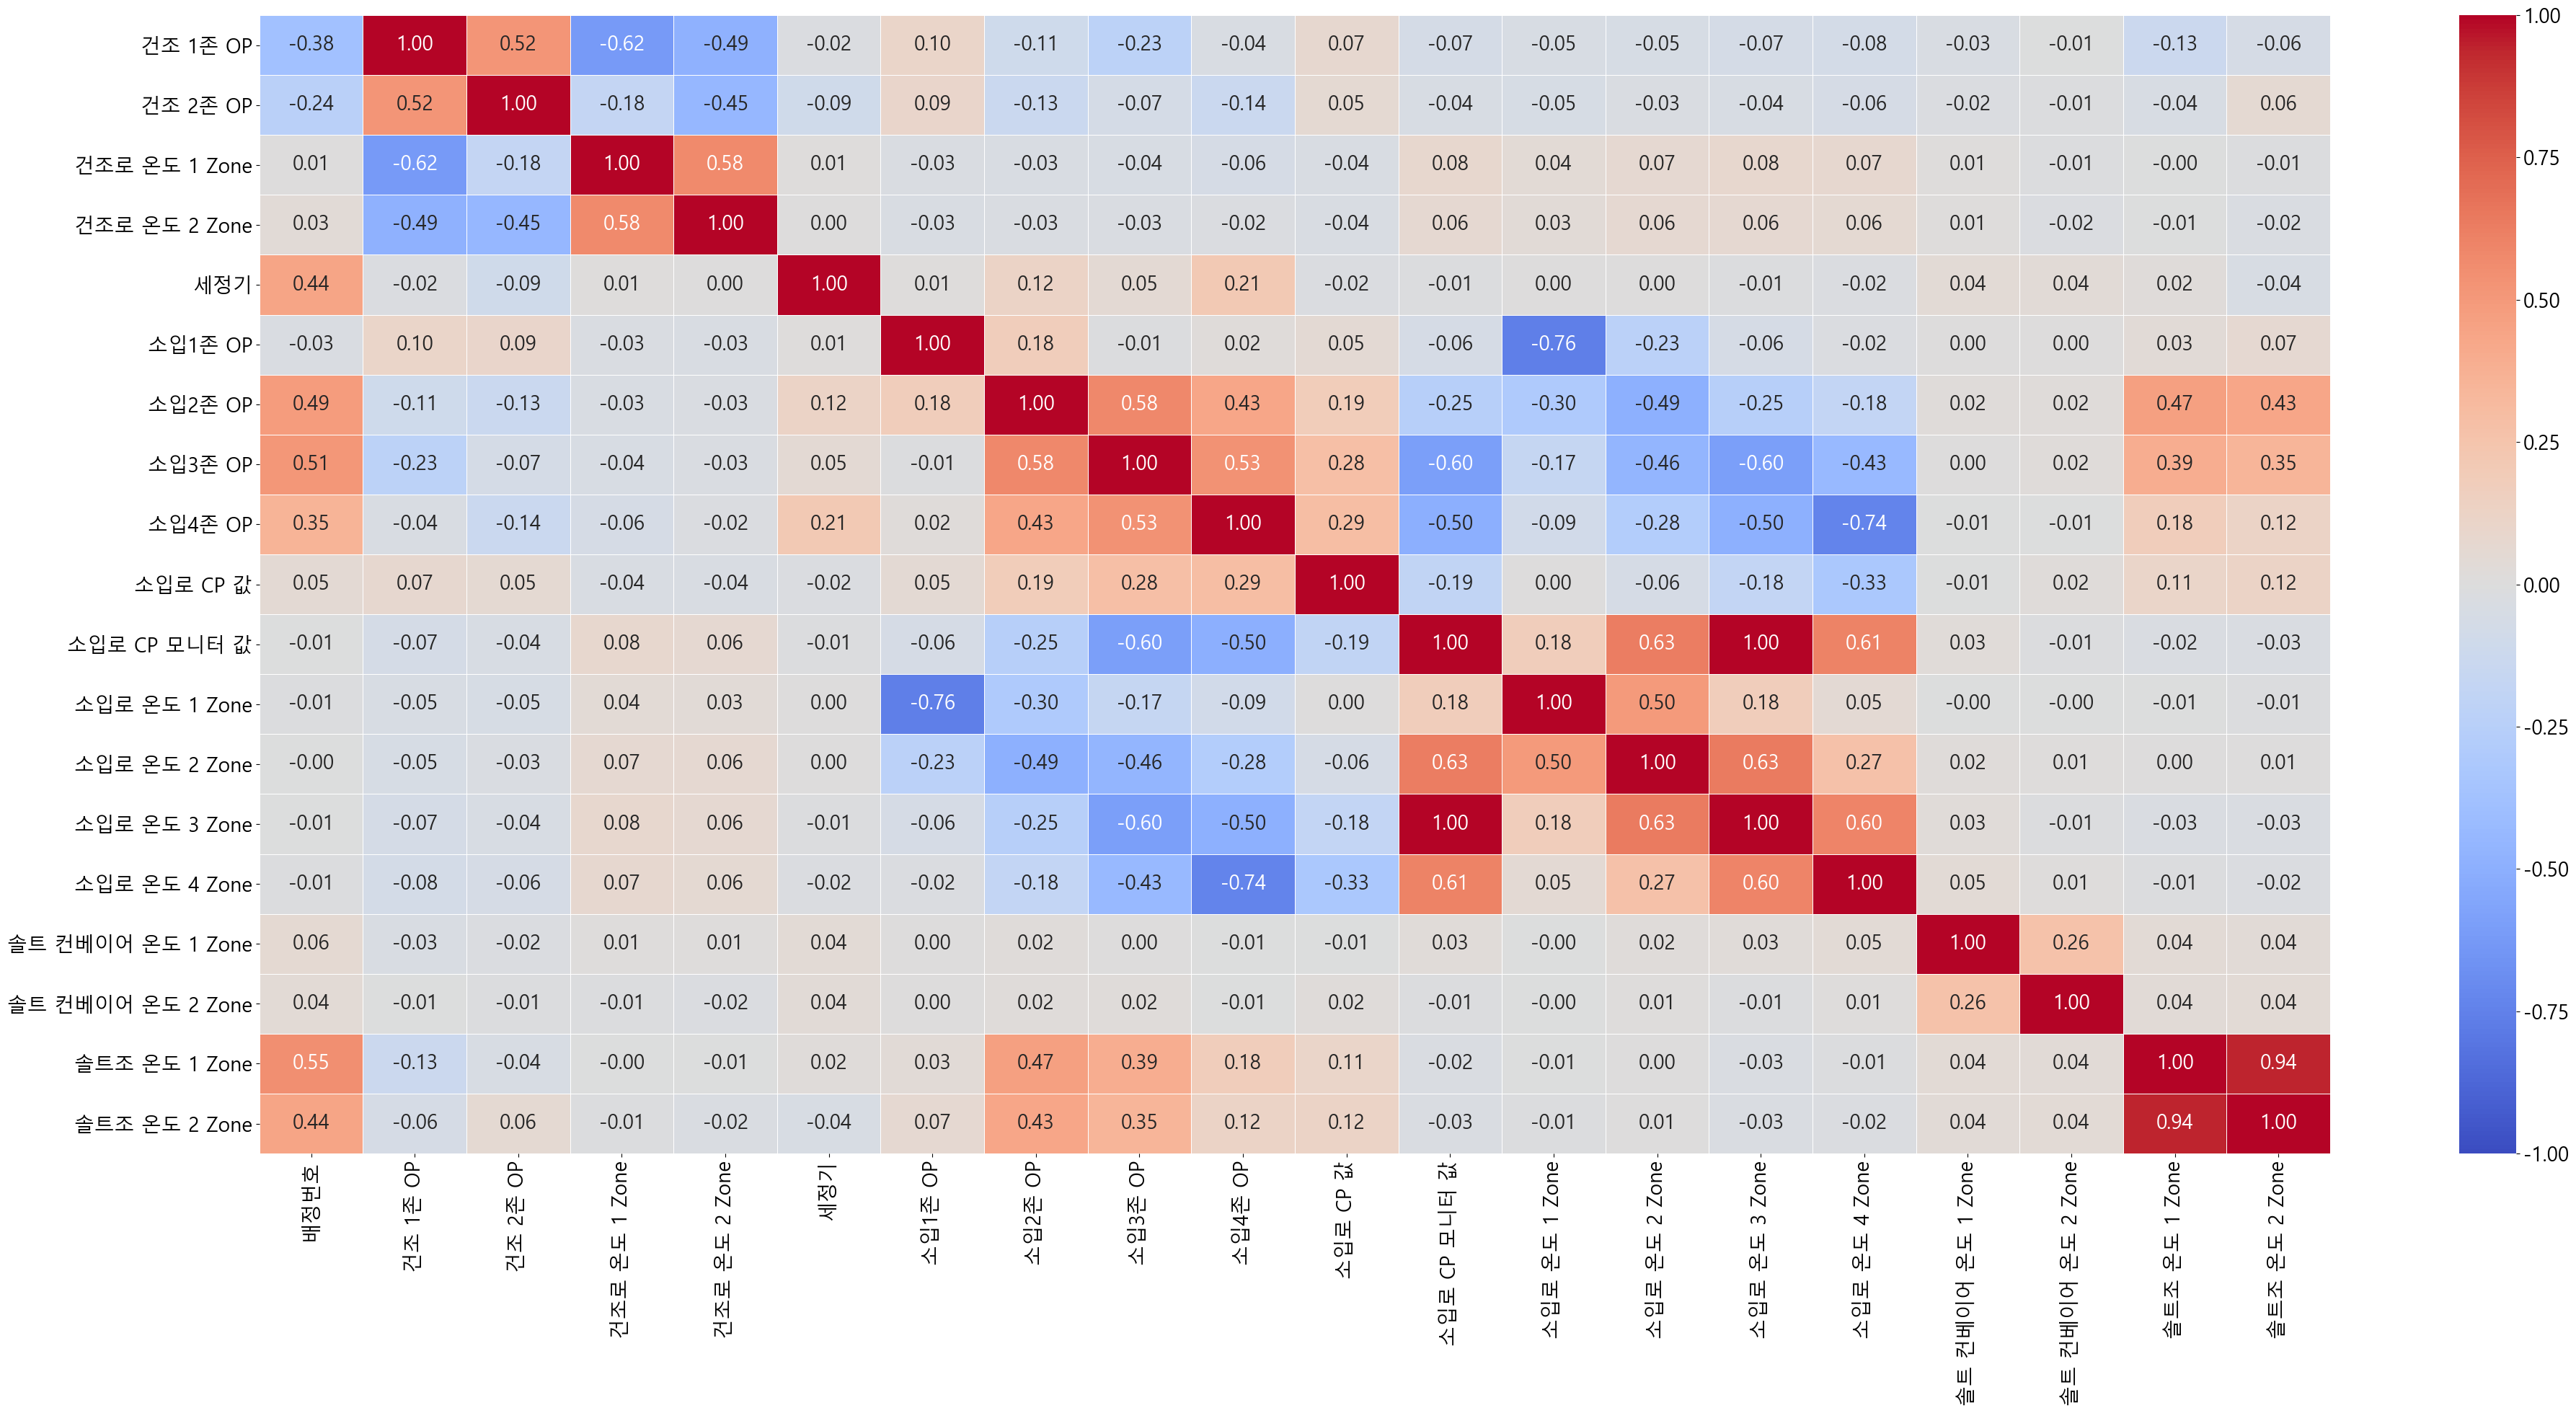

In [61]:
# 독립변수간의 상관관계를 파악
import matplotlib # 히트맵 옵션 설정
import numpy as np

# 음수 부호 미노출 오류 제거
matplotlib.rcParams['axes.unicode_minus'] = False

# 상관관계 히트맵
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Malgun Gothic'
cmap = 'coolwarm'
target_cor = df_minute.corr().loc[['건조 1존 OP', '건조 2존 OP', '건조로 온도 1 Zone',
                                   '건조로 온도 2 Zone', '세정기', '소입1존 OP', '소입2존 OP', '소입3존 OP', '소입4존 OP',
                                   '소입로 CP 값', '소입로 CP 모니터 값', '소입로 온도 1 Zone', '소입로 온도 2 Zone',
                                   '소입로 온도 3 Zone', '소입로 온도 4 Zone', '솔트 컨베이어 온도 1 Zone',
                                   '솔트 컨베이어 온도 2 Zone', '솔트조 온도 1 Zone', '솔트조 온도 2 Zone']]
# 겹치는 상관계수 제거, mask 정보 입력
# mask = np.triu(np.ones_like(target_cor, dtype = np.bool))
fig = plt.figure(figsize = (40, 20))
sns.heatmap(target_cor, 
            vmin = -1, vmax = 1,
            cmap = cmap, linewidths = .5,
           annot = True, fmt = '.2f', xticklabels = False, yticklabels = False)
plt.xticks(np.arange(0.5, len(target_cor.columns)+0.5, 1), target_cor.columns, size = 20, rotation = 90)
plt.yticks(np.arange(0.5, len(target_cor.index)+0.5, 1), target_cor.index, size = 20)
plt.tight_layout()

In [62]:
# 상관관계가 높은 변수 제거
df_minute.drop(['소입로 CP 모니터 값', '솔트조 온도 2 Zone'], axis = 1, inplace = True)

In [67]:
# 배정번호별 각 변수들의 통계량 : 평균, 표준편차
df_stat = df_minute.groupby(['배정번호']).agg(['mean', 'std'])

# 배정번호별 각 변수들의 통계량으로 변수 생성
chg_name = {'mean' : '_Avg', 'std' : '_Std'}
df_stat.columns = list(map(lambda x: x[0] + chg_name[x[1]], df_stat.columns))
df_stat.reset_index(drop = False, inplace = True)

df_stat.head()

배정번호  건조 1존 OP_Avg  건조 1존 OP_Std  건조 2존 OP_Avg  건조 2존 OP_Std  \
0  102410       72.2790        3.4140       21.4036        4.2195   
1  102585       72.2344        3.0858       18.6136        2.6641   
2  102930       70.7085        2.9737       20.9190        2.3555   
3  103142       72.4234        2.2699       22.2585        2.1404   
4  103675       72.7818        3.9335       21.8871        3.4620   

   건조로 온도 1 Zone_Avg  건조로 온도 1 Zone_Std  건조로 온도 2 Zone_Avg  건조로 온도 2 Zone_Std  \
0            99.9394             0.5900           100.0499             0.4960   
1            99.9869             0.5129           100.0643             0.3581   
2            99.9967             0.4714           100.0222             0.3441   
3           100.0046             0.3322           100.0069             0.2570   
4            99.9826             0.6521           100.0413             0.4710   

   세정기_Avg  세정기_Std  소입1존 OP_Avg  소입1존 OP_Std  소입2존 OP_Avg  소입2존 OP_Std  \
0  69.6031   0.8464      75.6965      22.5920      59.3066       1.6331   
1  69.5935   1.0643      75.1877      23.2043      59.1695       1.7476   
2  69.5282   1.0986      70.7492      23.1339      45.8536       1.9526   
3  69.5358   1.0636      77.3281      14.9093      46.0365       1.3640   
4  69.3165   0.9955      74.8375      23.1554      45.1695       1.2761   

   소입3존 OP_Avg  소입3존 OP_Std  소입4존 OP_Avg  소입4존 OP_Std  소입로 CP 값_Avg  \
0      50.6692       1.2226      70.2331       2.3733        0.4505   
1      52.0127       1.2754      70.6430       2.0732        0.4502   
2      48.2648       1.1837      67.1278       1.9474        0.4493   
3      50.5687       0.9572      69.4412       1.5859        0.4497   
4      50.2655       1.5748      69.7645       2.5731        0.4500   

   소입로 CP 값_Std  소입로 온도 1 Zone_Avg  소입로 온도 1 Zone_Std  소입로 온도 2 Zone_Avg  \
0        0.0053           859.5062             3.5543           860.0164   
1        0.0023           859.3365             3.0031           860.0085   
2        0.0053           859.6390             2.8021           859.9878   
3        0.0037           859.8530             1.5218           859.9951   
4        0.0025           859.8132             3.6628           859.9556   

   소입로 온도 2 Zone_Std  소입로 온도 3 Zone_Avg  소입로 온도 3 Zone_Std  소입로 온도 4 Zone_Avg  \
0             0.3998           860.0123             0.2797           860.0129   
1             0.4012           859.9907             0.2386           859.9910   
2             0.3814           859.9959             0.2382           860.0077   
3             0.2437           859.9971             0.1849           860.0035   
4             0.2918           860.0231             0.3162           860.0068   

   소입로 온도 4 Zone_Std  솔트 컨베이어 온도 1 Zone_Avg  솔트 컨베이어 온도 1 Zone_Std  \
0             0.5502               282.6539                 9.3875   
1             0.4765               282.7642                 9.5190   
2             0.4126               283.3464                 9.6903   
3             0.2933               282.8963                 9.4997   
4             0.5689               283.5173                 9.7558   

   솔트 컨베이어 온도 2 Zone_Avg  솔트 컨베이어 온도 2 Zone_Std  솔트조 온도 1 Zone_Avg  \
0               280.0968                 6.0415           329.0168   
1               279.7780                 7.1752           328.9986   
2               279.2893                 6.6703           329.1333   
3               279.2377                 6.5337           329.0819   
4               277.5625                 5.3773           329.0112   

   솔트조 온도 1 Zone_Std  
0             0.1182  
1             0.0944  
2             0.1150  
3             0.0910  
4             0.0833

In [69]:
# 품질 데이터 불러오기
quality = pd.read_excel('C:\\Users\\taek5\\Desktop\\TG\\SmartFactory\\data\\HeatTreatmentQualityAssurance\\quality.xlsx')
quality.head()

배정번호        작업일  공정명       설비명   양품수량  불량수량    총수량
0  102410 2022-01-03  열처리  열처리 염욕_1  15160     3  15163
1  102585 2022-01-03  열처리  열처리 염욕_1  29892    10  29902
2  102930 2022-01-04  열처리  열처리 염욕_1  59616    30  59646
3  103142 2022-01-05  열처리  열처리 염욕_1  74730    13  74743
4  103675 2022-01-06  열처리  열처리 염욕_1  14979     2  14981

In [70]:
# 품질 데이터 불필요한 변수 제거
quality.drop(['작업일', '공정명', '설비명', '양품수량'], axis = 1, inplace = True)

In [71]:
# 불량률 파생변수 생성
# 불량률 = (불량수량 / 전체수량) * 100
quality['불량률'] = round(quality['불량수량'] / quality['총수량'] * 100, 3)

In [76]:
# 데이터 통계치 확인
quality.describe()

배정번호     불량수량         총수량      불량률
count    136.0000 136.0000    136.0000 136.0000
mean  128897.1912  15.1176  45027.4191   0.0370
std    12403.3939  18.5497  25554.5487   0.0482
min   102410.0000   0.0000   8414.0000   0.0000
25%   120467.7500   4.0000  29755.0000   0.0127
50%   130199.0000   8.5000  44020.5000   0.0220
75%   138982.5000  17.0000  60135.5000   0.0460
max   148069.0000 120.0000 104761.0000   0.3690

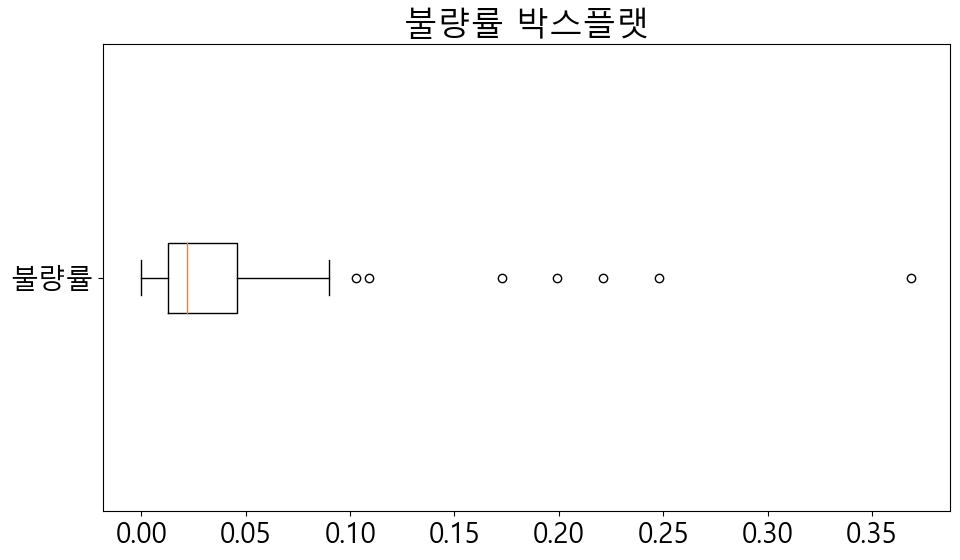

In [74]:
# 불량률 분포 파악
plt.figure(figsize = (10, 6))
plt.boxplot(quality['불량률'], vert = False)
plt.title('불량률 박스플랫')
plt.yticks([1], ['불량률'])
plt.tight_layout()

In [78]:
# 공정 데이터와 품질 데이터 병합
df_total = pd.merge(quality, df_stat, on = '배정번호', how = 'left')
df_total.head()

배정번호  불량수량    총수량    불량률  건조 1존 OP_Avg  건조 1존 OP_Std  건조 2존 OP_Avg  \
0  102410     3  15163 0.0200       72.2790        3.4140       21.4036   
1  102585    10  29902 0.0330       72.2344        3.0858       18.6136   
2  102930    30  59646 0.0500       70.7085        2.9737       20.9190   
3  103142    13  74743 0.0170       72.4234        2.2699       22.2585   
4  103675     2  14981 0.0130       72.7818        3.9335       21.8871   

   건조 2존 OP_Std  건조로 온도 1 Zone_Avg  건조로 온도 1 Zone_Std  건조로 온도 2 Zone_Avg  \
0        4.2195            99.9394             0.5900           100.0499   
1        2.6641            99.9869             0.5129           100.0643   
2        2.3555            99.9967             0.4714           100.0222   
3        2.1404           100.0046             0.3322           100.0069   
4        3.4620            99.9826             0.6521           100.0413   

   건조로 온도 2 Zone_Std  세정기_Avg  세정기_Std  소입1존 OP_Avg  소입1존 OP_Std  소입2존 OP_Avg  \
0             0.4960  69.6031   0.8464      75.6965      22.5920      59.3066   
1             0.3581  69.5935   1.0643      75.1877      23.2043      59.1695   
2             0.3441  69.5282   1.0986      70.7492      23.1339      45.8536   
3             0.2570  69.5358   1.0636      77.3281      14.9093      46.0365   
4             0.4710  69.3165   0.9955      74.8375      23.1554      45.1695   

   소입2존 OP_Std  소입3존 OP_Avg  소입3존 OP_Std  소입4존 OP_Avg  소입4존 OP_Std  \
0       1.6331      50.6692       1.2226      70.2331       2.3733   
1       1.7476      52.0127       1.2754      70.6430       2.0732   
2       1.9526      48.2648       1.1837      67.1278       1.9474   
3       1.3640      50.5687       0.9572      69.4412       1.5859   
4       1.2761      50.2655       1.5748      69.7645       2.5731   

   소입로 CP 값_Avg  소입로 CP 값_Std  소입로 온도 1 Zone_Avg  소입로 온도 1 Zone_Std  \
0        0.4505        0.0053           859.5062             3.5543   
1        0.4502        0.0023           859.3365             3.0031   
2        0.4493        0.0053           859.6390             2.8021   
3        0.4497        0.0037           859.8530             1.5218   
4        0.4500        0.0025           859.8132             3.6628   

   소입로 온도 2 Zone_Avg  소입로 온도 2 Zone_Std  소입로 온도 3 Zone_Avg  소입로 온도 3 Zone_Std  \
0           860.0164             0.3998           860.0123             0.2797   
1           860.0085             0.4012           859.9907             0.2386   
2           859.9878             0.3814           859.9959             0.2382   
3           859.9951             0.2437           859.9971             0.1849   
4           859.9556             0.2918           860.0231             0.3162   

   소입로 온도 4 Zone_Avg  소입로 온도 4 Zone_Std  솔트 컨베이어 온도 1 Zone_Avg  \
0           860.0129             0.5502               282.6539   
1           859.9910             0.4765               282.7642   
2           860.0077             0.4126               283.3464   
3           860.0035             0.2933               282.8963   
4           860.0068             0.5689               283.5173   

   솔트 컨베이어 온도 1 Zone_Std  솔트 컨베이어 온도 2 Zone_Avg  솔트 컨베이어 온도 2 Zone_Std  \
0                 9.3875               280.0968                 6.0415   
1                 9.5190               279.7780                 7.1752   
2                 9.6903               279.2893                 6.6703   
3                 9.4997               279.2377                 6.5337   
4                 9.7558               277.5625                 5.3773   

   솔트조 온도 1 Zone_Avg  솔트조 온도 1 Zone_Std  
0           329.0168             0.1182  
1           328.9986             0.0944  
2           329.1333             0.1150  
3           329.0819             0.0910  
4           329.0112             0.0833

In [79]:
# 병합 데이터 확인
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   배정번호                   136 non-null    int64  
 1   불량수량                   136 non-null    int64  
 2   총수량                    136 non-null    int64  
 3   불량률                    136 non-null    float64
 4   건조 1존 OP_Avg           136 non-null    float64
 5   건조 1존 OP_Std           136 non-null    float64
 6   건조 2존 OP_Avg           136 non-null    float64
 7   건조 2존 OP_Std           136 non-null    float64
 8   건조로 온도 1 Zone_Avg      136 non-null    float64
 9   건조로 온도 1 Zone_Std      136 non-null    float64
 10  건조로 온도 2 Zone_Avg      136 non-null    float64
 11  건조로 온도 2 Zone_Std      136 non-null    float64
 12  세정기_Avg                136 non-null    float64
 13  세정기_Std                136 non-null    float64
 14  소입1존 OP_Avg            136 non-null    float64
 15  소입1존 O

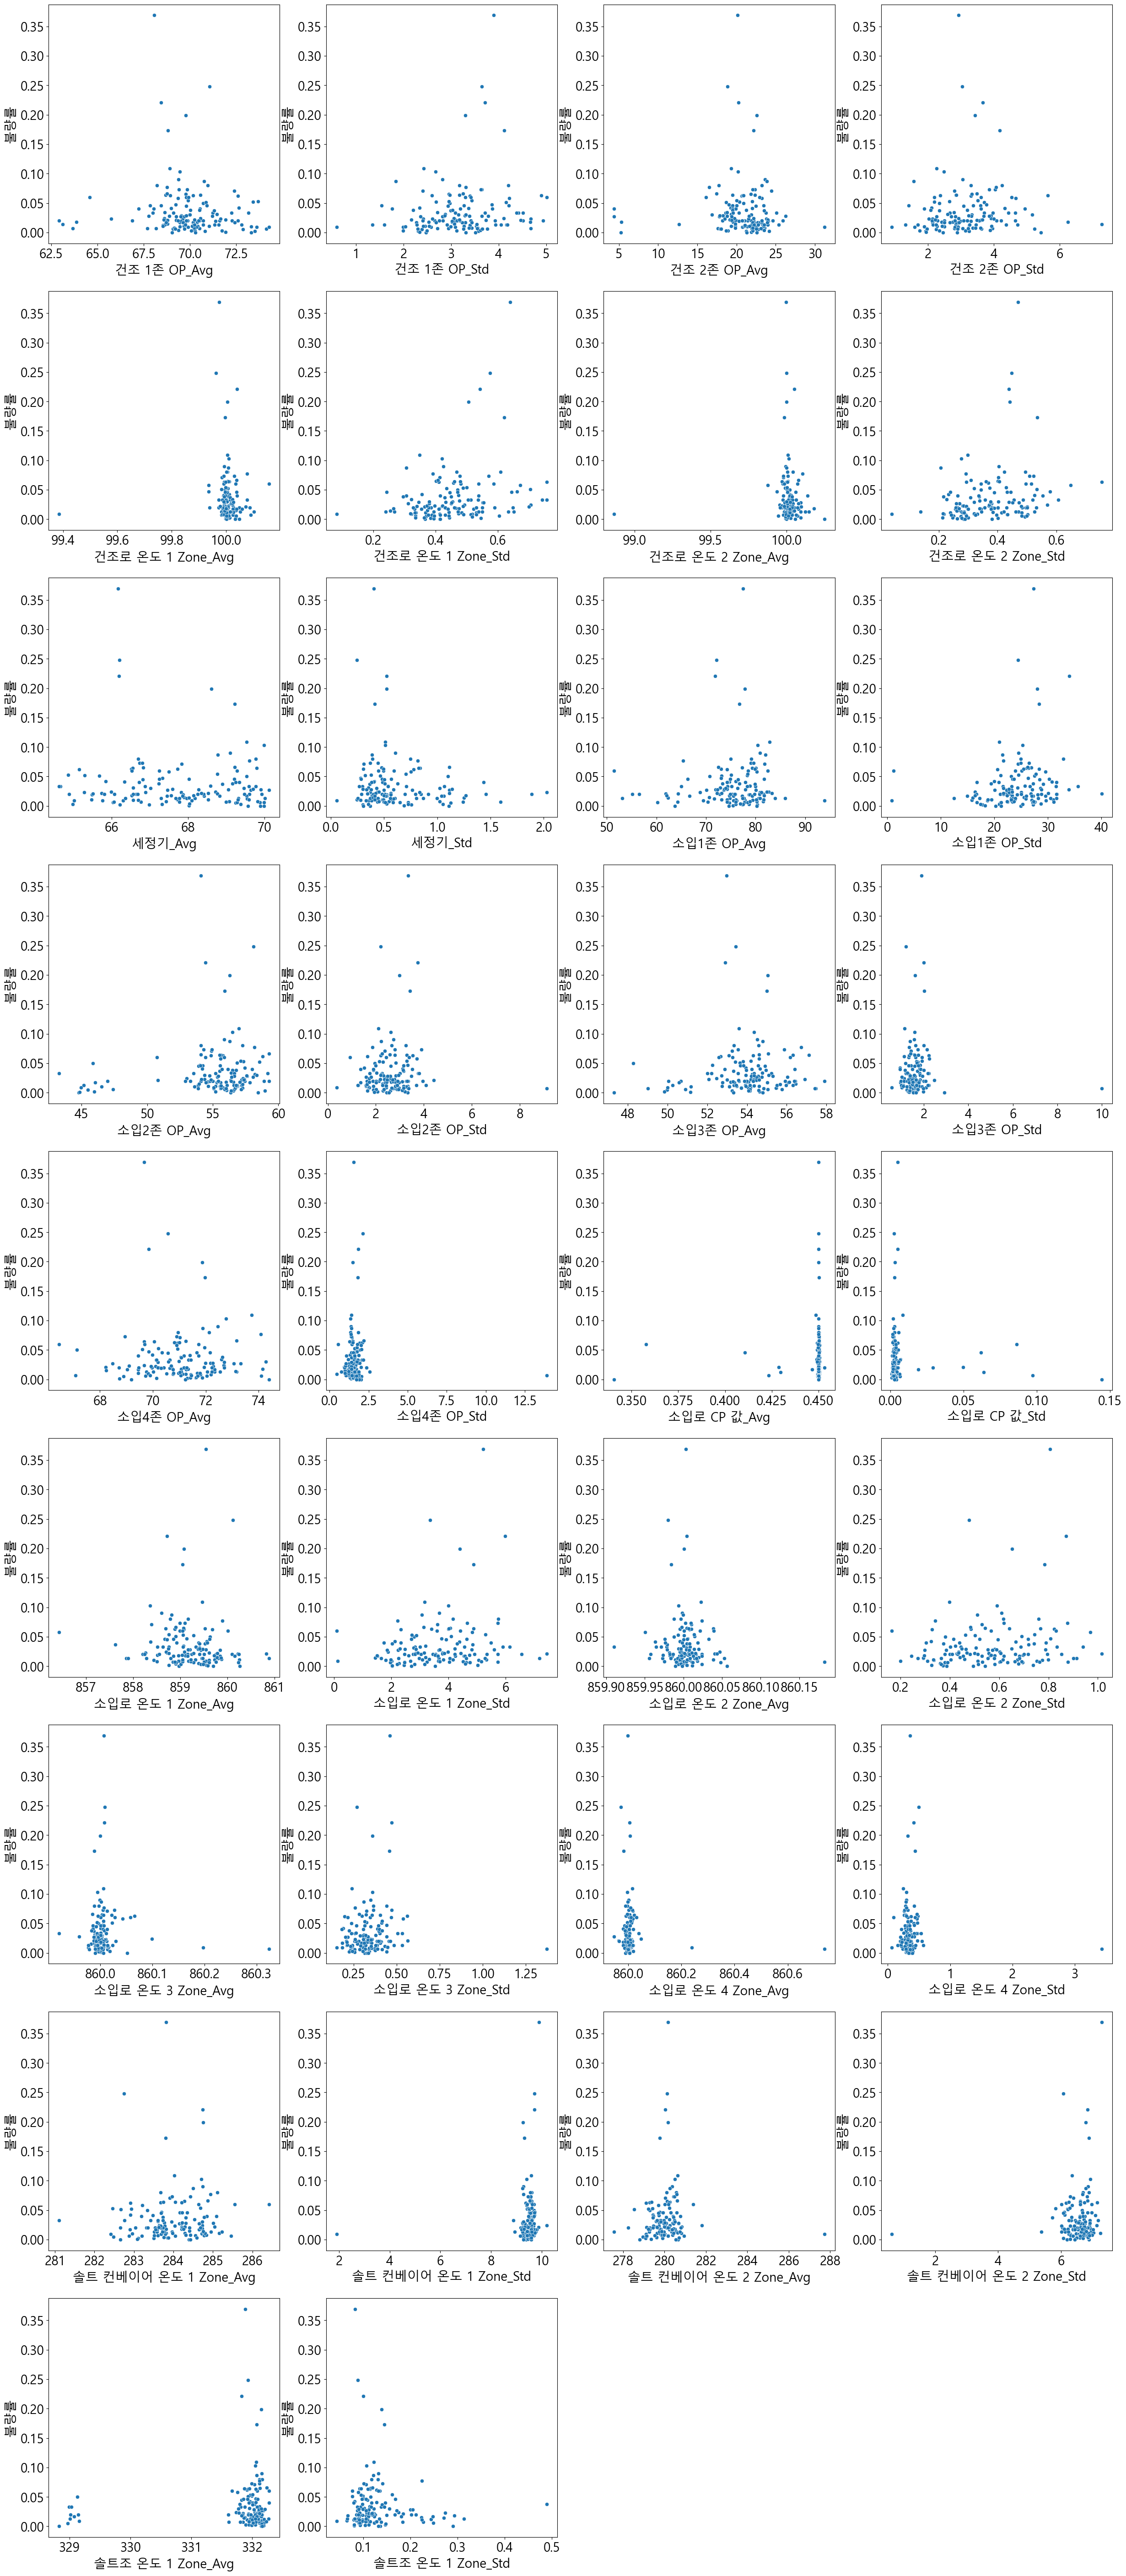

In [103]:
plt.figure(figsize = (30, 80))
cnt = 1
for i in df_total.columns[4:]:
    plt.subplot(10, 4, cnt)
    sns.scatterplot(data = df_total, x = i, y = '불량률')
    cnt += 1

In [104]:
df_total

배정번호  불량수량    총수량    불량률  건조 1존 OP_Avg  건조 1존 OP_Std  건조 2존 OP_Avg  \
0    102410     3  15163 0.0200       72.2790        3.4140       21.4036   
1    102585    10  29902 0.0330       72.2344        3.0858       18.6136   
2    102930    30  59646 0.0500       70.7085        2.9737       20.9190   
3    103142    13  74743 0.0170       72.4234        2.2699       22.2585   
4    103675     2  14981 0.0130       72.7818        3.9335       21.8871   
..      ...   ...    ...    ...           ...           ...           ...   
131  147292    12  43777 0.0270       69.4910        2.8151        4.3873   
132  147546    16  59973 0.0270       69.7025        2.3581       17.8049   
133  147982    12  40993 0.0290       69.7889        2.8709       17.8857   
134  147996     9  30248 0.0300       69.9893        3.3067       16.8831   
135  148069     0  58778 0.0000       69.0415        3.5165        5.2480   

     건조 2존 OP_Std  건조로 온도 1 Zone_Avg  건조로 온도 1 Zone_Std  건조로 온도 2 Zone_Avg  \
0          4.2195            99.9394             0.5900           100.0499   
1          2.6641            99.9869             0.5129           100.0643   
2          2.3555            99.9967             0.4714           100.0222   
3          2.1404           100.0046             0.3322           100.0069   
4          3.4620            99.9826             0.6521           100.0413   
..            ...                ...                ...                ...   
131        2.2704           100.0184             0.3787           100.0790   
132        2.8321           100.0244             0.3111           100.0048   
133        3.2388           100.0274             0.3448           100.0254   
134        5.1731            99.9921             0.3792           100.0015   
135        5.4271           100.0331             0.4151           100.2485   

     건조로 온도 2 Zone_Std  세정기_Avg  세정기_Std  소입1존 OP_Avg  소입1존 OP_Std  \
0               0.4960  69.6031   0.8464      75.6965      22.5920   
1               0.3581  69.5935   1.0643      75.1877      23.2043   
2               0.3441  69.5282   1.0986      70.7492      23.1339   
3               0.2570  69.5358   1.0636      77.3281      14.9093   
4               0.4710  69.3165   0.9955      74.8375      23.1554   
..                 ...      ...      ...          ...          ...   
131             0.2709  69.6414   0.7647      73.6133      22.2523   
132             0.2589  70.1266   0.4989      70.1022      20.0659   
133             0.3207  69.6966   1.1388      73.6998      22.7548   
134             0.3766  69.4659   1.0216      73.9478      21.6984   
135             0.3810  69.5746   1.1096      74.5811      21.3069   

     소입2존 OP_Avg  소입2존 OP_Std  소입3존 OP_Avg  소입3존 OP_Std  소입4존 OP_Avg  \
0        59.3066       1.6331      50.6692       1.2226      70.2331   
1        59.1695       1.7476      52.0127       1.2754      70.6430   
2        45.8536       1.9526      48.2648       1.1837      67.1278   
3        46.0365       1.3640      50.5687       0.9572      69.4412   
4        45.1695       1.2761      50.2655       1.5748      69.7645   
..           ...          ...          ...          ...          ...   
131      58.0840       1.8064      54.7544       1.0198      73.3105   
132      56.4238       1.5976      54.4832       1.3805      73.0560   
133      57.5808       2.3235      54.3667       1.3708      72.7000   
134      58.3316       2.2038      55.1029       1.5611      74.2738   
135      58.4563       2.5449      54.7861       1.6499      74.3979   

     소입4존 OP_Std  소입로 CP 값_Avg  소입로 CP 값_Std  소입로 온도 1 Zone_Avg  \
0         2.3733        0.4505        0.0053           859.5062   
1         2.0732        0.4502        0.0023           859.3365   
2         1.9474        0.4493        0.0053           859.6390   
3         1.5859        0.4497        0.0037           859.8530   
4         2.5731        0.4500        0.0025           859.8132   
..           ...           ...       

In [113]:
X_train = df_total.drop(['배정번호', '불량수량', '총수량'], axis = 1)
y = df_total['불량률']

In [ ]:
# 특성 표준화
from sklearn.preprocessing import MinMaxScaler

# 변형 객체 생성
scaler = MinMaxScaler()

# 학습 데이터 스케일링
X_train = scaler.fit_transform(X_train)

## 종속변수 라벨링

In [86]:
# 불량단계 변수 생성
df_total.loc[df_total['불량률'] >= 0.046, '불량단계'] = '위험'
df_total.loc[df_total['불량률'] < 0.046, '불량단계'] = '안정'

In [87]:
df_total['불량단계'].value_counts()

안정    101
위험     35
Name: 불량단계, dtype: int64

## PCA를 통한 주요 인자 도출

In [88]:
# PCA를 위한 표준화 작업 - 값의 크기에 따라 설명 가능한 분산량이 왜곡될 수 있으므로
from sklearn.preprocessing import StandardScaler

# 독립변수의 value값만 추출
x = df_total.drop(['배정번호', '불량수량', '총수량', '불량률', '불량단계'], axis = 1).values 

# 종속변수 추출
y = df_total['불량률'].values 

# 변형 객체 생성
scaler = StandardScaler() 

# 독립변수 스케일링
x_scaled = scaler.fit_transform(x)

In [219]:
features= df_total.columns[3: 79]
pd.DataFrame(x, columns = features)

ValueError: Shape of passed values is (136, 38), indices imply (136, 40)

In [89]:
features= df_total.columns[3: 41]
pd.DataFrame(x, columns = features)

건조 1존 OP_Avg  건조 1존 OP_Std  건조 2존 OP_Avg  건조 2존 OP_Std  \
0         72.2790        3.4140       21.4036        4.2195   
1         72.2344        3.0858       18.6136        2.6641   
2         70.7085        2.9737       20.9190        2.3555   
3         72.4234        2.2699       22.2585        2.1404   
4         72.7818        3.9335       21.8871        3.4620   
..            ...           ...           ...           ...   
131       69.4910        2.8151        4.3873        2.2704   
132       69.7025        2.3581       17.8049        2.8321   
133       69.7889        2.8709       17.8857        3.2388   
134       69.9893        3.3067       16.8831        5.1731   
135       69.0415        3.5165        5.2480        5.4271   

     건조로 온도 1 Zone_Avg  건조로 온도 1 Zone_Std  건조로 온도 2 Zone_Avg  \
0              99.9394             0.5900           100.0499   
1              99.9869             0.5129           100.0643   
2              99.9967             0.4714           100.0222   
3             100.0046             0.3322           100.0069   
4              99.9826             0.6521           100.0413   
..                 ...                ...                ...   
131           100.0184             0.3787           100.0790   
132           100.0244             0.3111           100.0048   
133           100.0274             0.3448           100.0254   
134            99.9921             0.3792           100.0015   
135           100.0331             0.4151           100.2485   

     건조로 온도 2 Zone_Std  세정기_Avg  세정기_Std  ...  소입로 온도 4 Zone_Avg  \
0               0.4960  69.6031   0.8464  ...           860.0129   
1               0.3581  69.5935   1.0643  ...           859.9910   
2               0.3441  69.5282   1.0986  ...           860.0077   
3               0.2570  69.5358   1.0636  ...           860.0035   
4               0.4710  69.3165   0.9955  ...           860.0068   
..                 ...      ...      ...  ...                ...   
131             0.2709  69.6414   0.7647  ...           859.9944   
132             0.2589  70.1266   0.4989  ...           859.9978   
133             0.3207  69.6966   1.1388  ...           860.0032   
134             0.3766  69.4659   1.0216  ...           859.9903   
135             0.3810  69.5746   1.1096  ...           860.0042   

     소입로 온도 4 Zone_Std  솔트 컨베이어 온도 1 Zone_Avg  솔트 컨베이어 온도 1 Zone_Std  \
0               0.5502               282.6539                 9.3875   
1               0.4765               282.7642                 9.5190   
2               0.4126               283.3464                 9.6903   
3               0.2933               282.8963                 9.4997   
4               0.5689               283.5173                 9.7558   
..                 ...                    ...                    ...   
131             0.3232               284.6556                 9.2404   
132             0.2012               284.2139                 9.3226   
133             0.3081               284.2213                 9.2356   
134             0.3389               284.7349                 9.2776   
135             0.3355               284.4332                 9.2782   

     솔트 컨베이어 온도 2 Zone_Avg  솔트 컨베이어 온도 2 Zone_Std  솔트조 온도 1 Zone_Avg  \
0                 280.0968                 6.0415           329.0168   
1                 279.7780                 7.1752           328.9986   
2                 279.2893                 6.6703           329.1333   
3                 279.2377                 6.5337           329.0819   
4                 277.5625                 5.3773           329.0112   
..                     ...                    ...                ...   
131               280.4299                 6.6968           332.1840   
132               279.9775                 6.6206           332.1551   
133               280.0041                 6.5530           332.2094   
134               280.5046                 6.7771           332.1508   
135  

In [90]:
from sklearn.decomposition import PCA

In [119]:
pca = PCA(n_components = 1)

In [120]:
printcipalComponents = pca.fit_transform(x)

In [121]:
principalDf = pd.DataFrame(data = printcipalComponents, columns = ['printcipal Component1', 'printcipal Component2'])

ValueError: Shape of passed values is (136, 1), indices imply (136, 2)

In [123]:
principalDf = pd.DataFrame(data = printcipalComponents, columns = ['printcipal Component1'])

In [124]:
pd.set_option('display.max_rows', None)
principalDf

printcipal Component1
0                  -0.9312
1                   0.2949
2                   4.3607
3                  -2.2908
4                   0.2410
5                  -0.1123
6                  10.1533
7                  -0.8133
8                  -1.5081
9                   0.2303
10                 -3.2560
11                 -2.4850
12                 -3.4299
13                 -0.4728
14                 -3.4106
15                 -0.8405
16                  2.6060
17                 -0.6818
18                  0.6327
19                  2.3942
20                  2.2776
21                  3.3553
22                  2.4583
23                  2.9837
24                 -3.0852
25                  5.5624
26                  0.0212
27                 -2.3816
28                 -0.4615
29                  1.8842
30                  2.8388
31                 -0.2994
32                  9.1968
33                  5.4300
34                  2.7261
35                 -1.5838
36                  0.9118
37                 -4.3634
38                 -5.6671
39                -21.6531
40                 -6.5465
41                 -3.8210
42                 -7.6376
43                 -5.4591
44                 -6.9920
45                 -5.7866
46                 -9.1341
47                 -3.9657
48                 13.3001
49                  0.5250
50                 -2.0308
51                 -0.2063
52                 -4.3886
53                 -3.6866
54                 -3.4617
55                 -7.1683
56                 -2.6230
57                 -6.6288
58                 10.3006
59                 -1.4757
60                 -5.0832
61                 -1.2507
62                  1.0147
63                 -1.5086
64                  3.5675
65                 -6.0951
66                 -2.9918
67                  1.9757
68                  5.0825
69                 -0.5636
70                 11.5786
71                 -3.8093
72                 21.4698
73                 -5.4249
74                  7.1078
75                 -4.8443
76                 -4.1291
77                 25.4027
78                 -4.9658
79                 -4.4523
80                 -0.9007
81                 -6.1066
82                 -2.5402
83                 -6.9305
84                 -7.0566
85                  2.1584
86                  1.0045
87                 -2.7713
88                 -7.3819
89                -10.5867
90                  1.4570
91                 -2.3871
92                 -4.9761
93                 -2.0905
94                 -4.1642
95                 -2.6010
96                 -7.2481
97                 -3.0907
98                 10.6918
99                  3.8618
100                -4.7238
101                -0.6533
102                 3.6314
103                -4.0839
104                20.9826
105                -6.5928
106                -2.0990
107                -5.9738
108                -2.8378
109                -1.3588
110                -7.4472
111                -4.5620
112                -3.1350
113                -3.5637
114                -6.7724
115                -5.9367
116                 3.0598
117                -5.9348
118                18.5370
119                -0.2629
120                 0.6793
121                 1.4429
122                 7.5222
123                -2.7086
124                -4.2103
125                10.8333
126                 3.7151
127                15.3518
128                16.1389
129                 5.9959
130                18.3534
131                 6.1671
132                 5.7636
133                 2.3476
134                 2.5547
135                 5.4126

In [125]:
pca.explained_variance_ratio_.sum()

0.3951787144564604

In [129]:
principalDf['불량률'] = df_total['불량률']

In [130]:
principalDf

printcipal Component1    불량률
0                  -0.9312 0.0200
1                   0.2949 0.0330
2                   4.3607 0.0500
3                  -2.2908 0.0170
4                   0.2410 0.0130
5                  -0.1123 0.0050
6                  10.1533 0.0000
7                  -0.8133 0.0200
8                  -1.5081 0.0090
9                   0.2303 0.0330
10                 -3.2560 0.0100
11                 -2.4850 0.0020
12                 -3.4299 0.0060
13                 -0.4728 0.0010
14                 -3.4106 0.0520
15                 -0.8405 0.0530
16                  2.6060 0.0510
17                 -0.6818 0.0420
18                  0.6327 0.0620
19                  2.3942 0.0310
20                  2.2776 0.0110
21                  3.3553 0.2480
22                  2.4583 0.0200
23                  2.9837 0.0220
24                 -3.0852 0.0030
25                  5.5624 0.0070
26                  0.0212 0.0030
27                 -2.3816 0.0400
28                 -0.4615 0.0110
29                  1.8842 0.0290
30                  2.8388 0.0470
31                 -0.2994 0.0090
32                  9.1968 0.0460
33                  5.4300 0.0090
34                  2.7261 0.0630
35                 -1.5838 0.0380
36                  0.9118 0.0180
37                 -4.3634 0.0190
38                 -5.6671 0.0330
39                -21.6531 0.0090
40                 -6.5465 0.0230
41                 -3.8210 0.0130
42                 -7.6376 0.0710
43                 -5.4591 0.0370
44                 -6.9920 0.0200
45                 -5.7866 0.0020
46                 -9.1341 0.0130
47                 -3.9657 0.0100
48                 13.3001 0.0210
49                  0.5250 0.0410
50                 -2.0308 0.0650
51                 -0.2063 0.0200
52                 -4.3886 0.0800
53                 -3.6866 0.0730
54                 -3.4617 0.0600
55                 -7.1683 0.0460
56                 -2.6230 0.0340
57                 -6.6288 0.1090
58                 10.3006 0.0330
59                 -1.4757 0.0450
60                 -5.0832 0.0580
61                 -1.2507 0.0300
62                  1.0147 0.0460
63                 -1.5086 0.3690
64                  3.5675 0.2210
65                 -6.0951 0.0240
66                 -2.9918 0.0640
67                  1.9757 0.0400
68                  5.0825 0.0150
69                 -0.5636 0.0070
70                 11.5786 0.0070
71                 -3.8093 0.0270
72                 21.4698 0.0200
73                 -5.4249 0.0200
74                  7.1078 0.0230
75                 -4.8443 0.0640
76                 -4.1291 0.0730
77                 25.4027 0.0600
78                 -4.9658 0.0230
79                 -4.4523 0.0630
80                 -0.9007 0.0170
81                 -6.1066 0.0130
82                 -2.5402 0.0170
83                 -6.9305 0.0180
84                 -7.0566 0.0240
85                  2.1584 0.0380
86                  1.0045 0.0110
87                 -2.7713 0.0540
88                 -7.3819 0.0600
89                -10.5867 0.0130
90                  1.4570 0.0800
91                 -2.3871 0.0330
92                 -4.9761 0.0000
93                 -2.0905 0.0060
94                 -4.1642 0.0080
95                 -2.6010 0.0030
96                 -7.2481 0.0220
97                 -3.0907 0.0190
98                 10.6918 0.0210
99                  3.8618 0.0280
100                -4.7238 0.1030
101                -0.6533 0.0200
102                 3.6314 0.0120
103                -4.0839 0.0170
104                20.9826 0.0130
105                -6.5928 0.0080
106                -2.0990 0.0040
107                -5.9738 0.0900
108                -2.8378 0.1990
109                -1.3588 0.1730
110                -7.4472 0.0870
111                -4.5620 0.0110
112                -3.1350 0.0060
113                -3.5637 0.0080
114                -6.7724 0.0110
115                -5.9367 0.0200
116                 3.0598 

<Axes: xlabel='printcipal Component1', ylabel='불량률'>

C:\Users\taek5\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\taek5\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\taek5\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\taek5\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\taek5\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

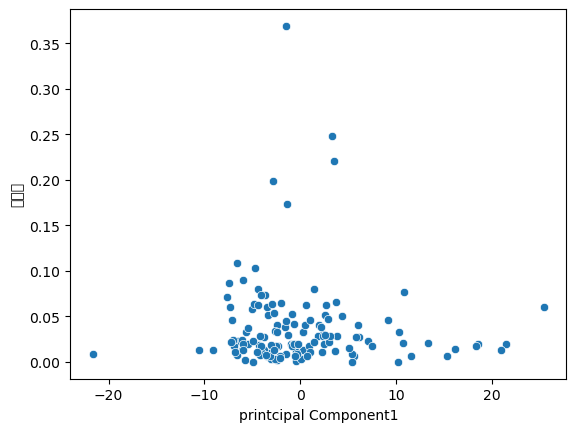

In [131]:
sns.scatterplot(data = principalDf, x = 'printcipal Component1', y = '불량률')

<Axes: xlabel='printcipal Component1', ylabel='printcipal Component2'>

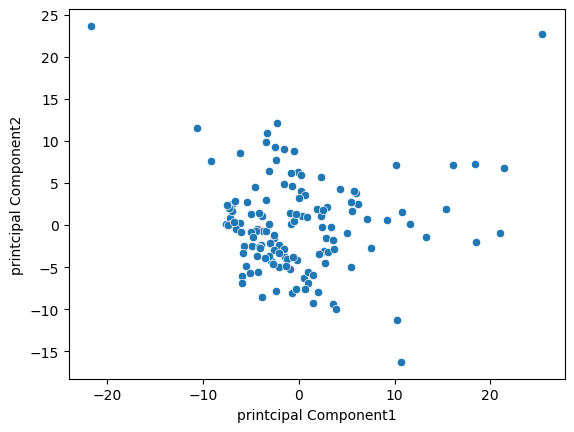

In [96]:
sns.scatterplot(data = principalDf, x = 'printcipal Component1', y = 'printcipal Component2')

In [230]:
principalDf.iloc[25]

printcipal Component1   5.5624
printcipal Component2   1.6676
Name: 25, dtype: float64

In [231]:
df_total.iloc[25]

배정번호                      118005
불량수량                           4
총수량                        59858
건조 1존 OP_Avg             70.5066
건조 1존 OP_Std              2.9440
건조 2존 OP_Avg             17.6525
건조 2존 OP_Std              2.8090
건조로 온도 1 Zone_Avg       100.0259
건조로 온도 1 Zone_Std         0.3771
건조로 온도 2 Zone_Avg       100.0350
건조로 온도 2 Zone_Std         0.2428
세정기_Avg                  66.7684
세정기_Std                   0.4394
소입1존 OP_Avg              70.3820
소입1존 OP_Std              22.5001
소입2존 OP_Avg              55.0579
소입2존 OP_Std               9.1259
소입3존 OP_Avg              49.0132
소입3존 OP_Std               9.9931
소입4존 OP_Avg              67.0798
소입4존 OP_Std              13.8970
소입로 CP 값_Avg              0.4235
소입로 CP 값_Std              0.0974
소입로 CP 모니터 값_Avg          0.0000
소입로 CP 모니터 값_Std          0.0000
소입로 온도 1 Zone_Avg       859.5094
소입로 온도 1 Zone_Std         2.4549
소입로 온도 2 Zone_Avg       860.1825
소입로 온도 2 Zone_Std         0.8780
소입로 온도 3 Zone_Avg       860.3246
소입로 온도 3 Z

In [232]:
principalDf.iloc[39]

printcipal Component1   -21.6531
printcipal Component2    23.6594
Name: 39, dtype: float64

In [233]:
df_total.iloc[39]

배정번호                      122460
불량수량                           1
총수량                        11552
건조 1존 OP_Avg             74.2808
건조 1존 OP_Std              0.5940
건조 2존 OP_Avg             31.1970
건조 2존 OP_Std              0.8999
건조로 온도 1 Zone_Avg        99.3857
건조로 온도 1 Zone_Std         0.0808
건조로 온도 2 Zone_Avg        98.8660
건조로 온도 2 Zone_Std         0.0393
세정기_Avg                  65.0129
세정기_Std                   0.0541
소입1존 OP_Avg              93.8661
소입1존 OP_Std               0.8122
소입2존 OP_Avg              55.7752
소입2존 OP_Std               0.3611
소입3존 OP_Avg              54.0530
소입3존 OP_Std               0.5487
소입4존 OP_Avg              71.1261
소입4존 OP_Std               0.4495
소입로 CP 값_Avg              0.4497
소입로 CP 값_Std              0.0008
소입로 CP 모니터 값_Avg          0.0000
소입로 CP 모니터 값_Std          0.0000
소입로 온도 1 Zone_Avg       858.9649
소입로 온도 1 Zone_Std         0.1249
소입로 온도 2 Zone_Avg       860.0178
소입로 온도 2 Zone_Std         0.1996
소입로 온도 3 Zone_Avg       860.1979
소입로 온도 3 Z

In [234]:
principalDf.iloc[77]

printcipal Component1   25.4027
printcipal Component2   22.6819
Name: 77, dtype: float64

In [235]:
df_total.iloc[77]

배정번호                      131758
불량수량                           9
총수량                        15015
건조 1존 OP_Avg             64.5778
건조 1존 OP_Std              5.0116
건조 2존 OP_Avg             16.1036
건조 2존 OP_Std              4.5376
건조로 온도 1 Zone_Avg       100.1591
건조로 온도 1 Zone_Std         0.5383
건조로 온도 2 Zone_Avg       100.0712
건조로 온도 2 Zone_Std         0.5154
세정기_Avg                  66.5325
세정기_Std                   0.4958
소입1존 OP_Avg              51.4359
소입1존 OP_Std               1.2182
소입2존 OP_Avg              50.7409
소입2존 OP_Std               0.9152
소입3존 OP_Avg              56.1879
소입3존 OP_Std               1.3102
소입4존 OP_Avg              66.4571
소입4존 OP_Std               0.5594
소입로 CP 값_Avg              0.3578
소입로 CP 값_Std              0.0864
소입로 CP 모니터 값_Avg          0.0000
소입로 CP 모니터 값_Std          0.0000
소입로 온도 1 Zone_Avg       860.0170
소입로 온도 1 Zone_Std         0.0838
소입로 온도 2 Zone_Avg       860.0391
소입로 온도 2 Zone_Std         0.1632
소입로 온도 3 Zone_Avg       860.0574
소입로 온도 3 Z

In [140]:
tmp = principalDf.drop([25, 39, 77], axis = 0)

<Axes: xlabel='printcipal Component1', ylabel='printcipal Component2'>

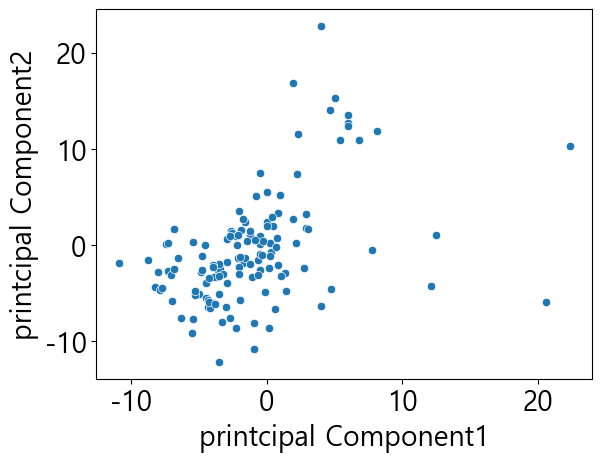

In [141]:
sns.scatterplot(data = tmp, x = 'printcipal Component1', y = 'printcipal Component2')

C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

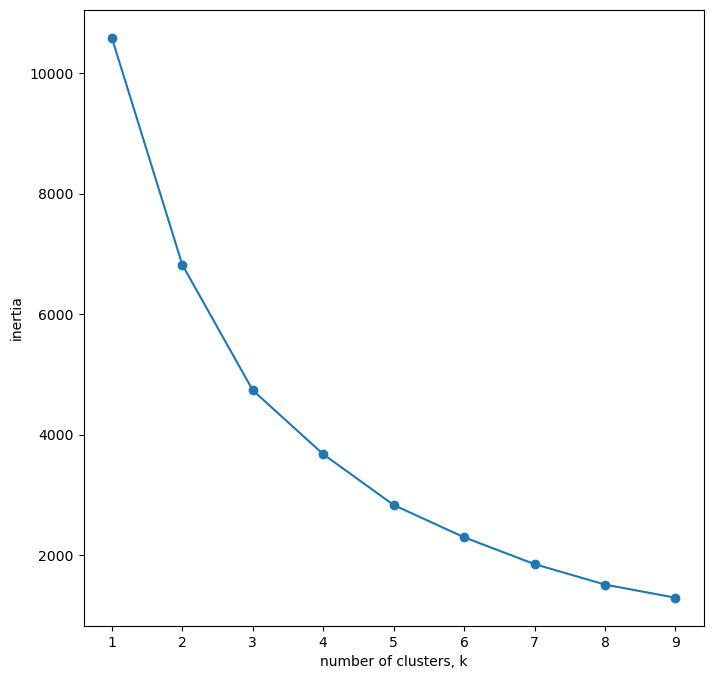

In [97]:
# 군집화
from sklearn.cluster import KMeans

# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합)
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(principalDf)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize = (8, 8))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [98]:
# K-Means 모델과 군집 예측값 생성
clust_model = KMeans(n_clusters = 3)

# 생성한 모델 데이터 학습
clust_model.fit(principalDf)

# 각 군집의 중심점
centers = clust_model.cluster_centers_
print(pd.DataFrame(centers))

# 각 예측군집
pred = clust_model.predict(principalDf)
print(pred)

C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        0       1
0 -0.6659 -3.5745
1 -4.5218  4.6857
2 11.9595  3.3857
[1 0 2 1 1 1 2 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 2 1 1 0 0 0 0 2 0 0 1 0
 0 0 1 1 0 1 0 1 0 1 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 2 1 2 1
 2 0 0 2 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 2 1 0 1 0 0 1
 1 0 0 1 0 0 0 2 0 0 0 2 0 0 2 0 2 2 2 2 2 2 0 0 2]


In [99]:
# pca 데이터에 예측된 군집 붙이기
principalDf['clust'] = pred
principalDf

printcipal Component1  printcipal Component2  clust
0                  -0.9312                 1.4517      1
1                   0.2949                 1.0872      0
2                   4.3607                 4.3140      2
3                  -2.2908                12.0900      1
4                   0.2410                 4.0310      1
5                  -0.1123                 6.2892      1
6                  10.1533                 7.0936      2
7                  -0.8133                 6.1293      1
8                  -1.5081                 8.9828      1
9                   0.2303                 5.9245      1
10                 -3.2560                10.9310      1
11                 -2.4850                 9.3196      1
12                 -3.4299                 9.8556      1
13                 -0.4728                 8.7956      1
14                 -3.4106                 2.9566      1
15                 -0.8405                 0.0999      0
16                  2.6060                -3.1388      0
17                 -0.6818                 4.6003      1
18                  0.6327                 3.5325      1
19                  2.3942                -0.2144      0
20                  2.2776                 5.6792      1
21                  3.3553                -0.2806      0
22                  2.4583                 1.2764      0
23                  2.9837                 2.1128      0
24                 -3.0852                 6.3798      1
25                  5.5624                 1.6676      2
26                  0.0212                 3.2314      1
27                 -2.3816                 7.7317      1
28                 -0.4615                 0.4479      0
29                  1.8842                 1.8657      0
30                  2.8388                -1.5221      0
31                 -0.2994                 1.3030      0
32                  9.1968                 0.5962      2
33                  5.4300                -5.0364      0
34                  2.7261                -4.4524      0
35                 -1.5838                 4.8523      1
36                  0.9118                 0.9638      0
37                 -4.3634                -3.6302      0
38                 -5.6671                -2.5031      0
39                -21.6531                23.6594      1
40                 -6.5465                -0.2695      1
41                 -3.8210                -8.5168      0
42                 -7.6376                 0.0923      1
43                 -5.4591                -4.8785      0
44                 -6.9920                 2.4571      1
45                 -5.7866                -3.2836      0
46                 -9.1341                 7.6511      1
47                 -3.9657                -2.3597      0
48                 13.3001                -1.3734      2
49                  0.5250                -6.3023      0
50                 -2.0308                -2.3831      0
51                 -0.2063                -4.1650      0
52                 -4.3886                -0.4327      0
53                 -3.6866                -0.7548      0
54                 -3.4617                -0.7092      0
55                 -7.1683                 0.8722      1
56                 -2.6230                -1.4962      0
57                 -6.6288                 2.8788      1
58                 10.3006               -11.2581      0
59                 -1.4757                -3.7367      0
60                 -5.0832                -5.7307      0
61                 -1.2507                -4.0420      0
62                  1.0147                -5.5878      0
63                 -1.5086                -2.8958      0
64                  3.5675                -9.4226      0
65                 -6.0951                 8.5625      1
66                 -2.9918                -2.1450      0
67                  1.9757                -7.9767      0
68                  5.0825                -0.9275      0
69             

In [100]:
principalDf['clust'].value_counts()

0    74
1    42
2    20
Name: clust, dtype: int64

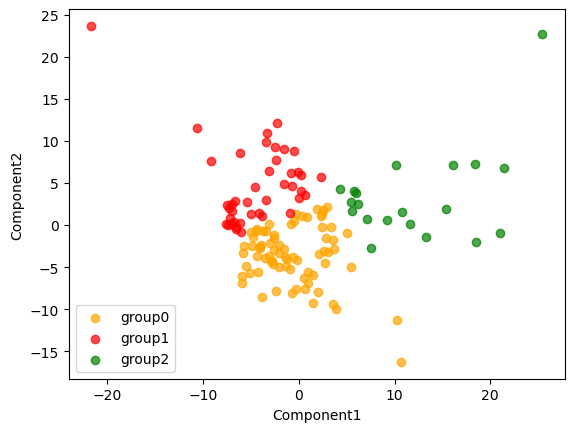

In [105]:
# target 별 분리
principalDf_0 = principalDf[principalDf['clust'] == 0]
principalDf_1 = principalDf[principalDf['clust'] == 1]
principalDf_2 = principalDf[principalDf['clust'] == 2]

# target 별 시각화
plt.scatter(principalDf_0['printcipal Component1'], principalDf_0['printcipal Component2'], color = 'orange',
           alpha = 0.7, label = 'group0')
plt.scatter(principalDf_1['printcipal Component1'], principalDf_1['printcipal Component2'], color = 'red',
           alpha = 0.7, label = 'group1')
plt.scatter(principalDf_2['printcipal Component1'], principalDf_2['printcipal Component2'], color = 'green',
           alpha = 0.7, label = 'group2')

plt.xlabel('Component1')
plt.ylabel('Component2')
plt.legend()
plt.show()

In [108]:
principalDf['배정번호'] = df_total['배정번호']
principalDf

printcipal Component1  printcipal Component2  clust    배정번호
0                  -0.9312                 1.4517      1  102410
1                   0.2949                 1.0872      0  102585
2                   4.3607                 4.3140      2  102930
3                  -2.2908                12.0900      1  103142
4                   0.2410                 4.0310      1  103675
5                  -0.1123                 6.2892      1  103719
6                  10.1533                 7.0936      2  104126
7                  -0.8133                 6.1293      1  104388
8                  -1.5081                 8.9828      1  105072
9                   0.2303                 5.9245      1  105815
10                 -3.2560                10.9310      1  106027
11                 -2.4850                 9.3196      1  106293
12                 -3.4299                 9.8556      1  107402
13                 -0.4728                 8.7956      1  108503
14                 -3.4106                 2.9566      1  113479
15                 -0.8405                 0.0999      0  113977
16                  2.6060                -3.1388      0  114449
17                 -0.6818                 4.6003      1  114453
18                  0.6327                 3.5325      1  114838
19                  2.3942                -0.2144      0  116198
20                  2.2776                 5.6792      1  116324
21                  3.3553                -0.2806      0  116413
22                  2.4583                 1.2764      0  116694
23                  2.9837                 2.1128      0  116862
24                 -3.0852                 6.3798      1  117694
25                  5.5624                 1.6676      2  118005
26                  0.0212                 3.2314      1  118664
27                 -2.3816                 7.7317      1  118674
28                 -0.4615                 0.4479      0  118961
29                  1.8842                 1.8657      0  119202
30                  2.8388                -1.5221      0  119208
31                 -0.2994                 1.3030      0  119448
32                  9.1968                 0.5962      2  119662
33                  5.4300                -5.0364      0  120395
34                  2.7261                -4.4524      0  120492
35                 -1.5838                 4.8523      1  120867
36                  0.9118                 0.9638      0  121210
37                 -4.3634                -3.6302      0  122221
38                 -5.6671                -2.5031      0  122371
39                -21.6531                23.6594      1  122460
40                 -6.5465                -0.2695      1  123527
41                 -3.8210                -8.5168      0  123689
42                 -7.6376                 0.0923      1  123708
43                 -5.4591                -4.8785      0  124128
44                 -6.9920                 2.4571      1  124532
45                 -5.7866                -3.2836      0  124585
46                 -9.1341                 7.6511      1  124809
47                 -3.9657                -2.3597      0  124852
48                 13.3001                -1.3734      2  124960
49                  0.5250                -6.3023      0  125355
50                 -2.0308                -2.3831      0  125379
51                 -0.2063                -4.1650      0  125637
52                 -4.3886                -0.4327      0  125919
53                 -3.6866                -0.7548      0  126069
54                 -3.4617                -0.7092      0  126407
55                 -7.1683                 0.8722      1  126519
56                 -2.6230                -1.4962      0  126569
57                 -6.6288                 2.8788      1  126806
58                 10.3006               -11.2581      0  127519
59                 -1.4757                -3.7367      0  127525
60                 -5.0832              

In [109]:
principalDf['불량률'] = df_total['불량률']
principalDf

printcipal Component1  printcipal Component2  clust    배정번호    불량률
0                  -0.9312                 1.4517      1  102410 0.0200
1                   0.2949                 1.0872      0  102585 0.0330
2                   4.3607                 4.3140      2  102930 0.0500
3                  -2.2908                12.0900      1  103142 0.0170
4                   0.2410                 4.0310      1  103675 0.0130
5                  -0.1123                 6.2892      1  103719 0.0050
6                  10.1533                 7.0936      2  104126 0.0000
7                  -0.8133                 6.1293      1  104388 0.0200
8                  -1.5081                 8.9828      1  105072 0.0090
9                   0.2303                 5.9245      1  105815 0.0330
10                 -3.2560                10.9310      1  106027 0.0100
11                 -2.4850                 9.3196      1  106293 0.0020
12                 -3.4299                 9.8556      1  107402 0.0060
13                 -0.4728                 8.7956      1  108503 0.0010
14                 -3.4106                 2.9566      1  113479 0.0520
15                 -0.8405                 0.0999      0  113977 0.0530
16                  2.6060                -3.1388      0  114449 0.0510
17                 -0.6818                 4.6003      1  114453 0.0420
18                  0.6327                 3.5325      1  114838 0.0620
19                  2.3942                -0.2144      0  116198 0.0310
20                  2.2776                 5.6792      1  116324 0.0110
21                  3.3553                -0.2806      0  116413 0.2480
22                  2.4583                 1.2764      0  116694 0.0200
23                  2.9837                 2.1128      0  116862 0.0220
24                 -3.0852                 6.3798      1  117694 0.0030
25                  5.5624                 1.6676      2  118005 0.0070
26                  0.0212                 3.2314      1  118664 0.0030
27                 -2.3816                 7.7317      1  118674 0.0400
28                 -0.4615                 0.4479      0  118961 0.0110
29                  1.8842                 1.8657      0  119202 0.0290
30                  2.8388                -1.5221      0  119208 0.0470
31                 -0.2994                 1.3030      0  119448 0.0090
32                  9.1968                 0.5962      2  119662 0.0460
33                  5.4300                -5.0364      0  120395 0.0090
34                  2.7261                -4.4524      0  120492 0.0630
35                 -1.5838                 4.8523      1  120867 0.0380
36                  0.9118                 0.9638      0  121210 0.0180
37                 -4.3634                -3.6302      0  122221 0.0190
38                 -5.6671                -2.5031      0  122371 0.0330
39                -21.6531                23.6594      1  122460 0.0090
40                 -6.5465                -0.2695      1  123527 0.0230
41                 -3.8210                -8.5168      0  123689 0.0130
42                 -7.6376                 0.0923      1  123708 0.0710
43                 -5.4591                -4.8785      0  124128 0.0370
44                 -6.9920                 2.4571      1  124532 0.0200
45                 -5.7866                -3.2836      0  124585 0.0020
46                 -9.1341                 7.6511      1  124809 0.0130
47                 -3.9657                -2.3597      0  124852 0.0100
48                 13.3001                -1.3734      2  124960 0.0210
49                  0.5250                -6.3023      0  125355 0.0410
50                 -2.0308                -2.3831      0  125379 0.0650
51                 -0.2063                -4.1650      0  125637 0.0200
52                 -4.3886                -0.4327      0  125919 0.0800
53                 -3.6866                -0.7548      0  126069 0.0730
54                 -3.4617                -0.

In [112]:
principalDf[principalDf['clust'] == 0]['불량률'].mean()

0.046

In [115]:
principalDf[principalDf['clust'] == 0]

printcipal Component1  printcipal Component2  clust    배정번호    불량률
1                   0.2949                 1.0872      0  102585 0.0330
15                 -0.8405                 0.0999      0  113977 0.0530
16                  2.6060                -3.1388      0  114449 0.0510
19                  2.3942                -0.2144      0  116198 0.0310
21                  3.3553                -0.2806      0  116413 0.2480
22                  2.4583                 1.2764      0  116694 0.0200
23                  2.9837                 2.1128      0  116862 0.0220
28                 -0.4615                 0.4479      0  118961 0.0110
29                  1.8842                 1.8657      0  119202 0.0290
30                  2.8388                -1.5221      0  119208 0.0470
31                 -0.2994                 1.3030      0  119448 0.0090
33                  5.4300                -5.0364      0  120395 0.0090
34                  2.7261                -4.4524      0  120492 0.0630
36                  0.9118                 0.9638      0  121210 0.0180
37                 -4.3634                -3.6302      0  122221 0.0190
38                 -5.6671                -2.5031      0  122371 0.0330
41                 -3.8210                -8.5168      0  123689 0.0130
43                 -5.4591                -4.8785      0  124128 0.0370
45                 -5.7866                -3.2836      0  124585 0.0020
47                 -3.9657                -2.3597      0  124852 0.0100
49                  0.5250                -6.3023      0  125355 0.0410
50                 -2.0308                -2.3831      0  125379 0.0650
51                 -0.2063                -4.1650      0  125637 0.0200
52                 -4.3886                -0.4327      0  125919 0.0800
53                 -3.6866                -0.7548      0  126069 0.0730
54                 -3.4617                -0.7092      0  126407 0.0600
56                 -2.6230                -1.4962      0  126569 0.0340
58                 10.3006               -11.2581      0  127519 0.0330
59                 -1.4757                -3.7367      0  127525 0.0450
60                 -5.0832                -5.7307      0  127639 0.0580
61                 -1.2507                -4.0420      0  128008 0.0300
62                  1.0147                -5.5878      0  128388 0.0460
63                 -1.5086                -2.8958      0  128795 0.3690
64                  3.5675                -9.4226      0  128800 0.2210
66                 -2.9918                -2.1450      0  129889 0.0640
67                  1.9757                -7.9767      0  130178 0.0400
68                  5.0825                -0.9275      0  130220 0.0150
69                 -0.5636                -3.8284      0  130332 0.0070
75                 -4.8443                -2.4659      0  131424 0.0640
76                 -4.1291                -2.6595      0  131711 0.0730
79                 -4.4523                -0.6766      0  132161 0.0630
80                 -0.9007                -5.2635      0  132414 0.0170
82                 -2.5402                -2.9239      0  132857 0.0170
85                  2.1584                -3.4842      0  133924 0.0380
86                  1.0045                -6.8564      0  134379 0.0110
87                 -2.7713                -4.2167      0  134495 0.0540
90                  1.4570                -9.2726      0  135125 0.0800
91                 -2.3871                -7.7940      0  135556 0.0330
92                 -4.9761                -0.8270      0  135615 0.0000
93                 -2.0905                -3.2633      0  135704 0.0060
95                 -2.6010                -1.1434      0  136603 0.0030
97                 -3.0907                 0.0741      0  137996 0.0190
98                 10.6918               -16.2572      0  138084 0.0210
99                  3.8618                -9.9805      0  138123 0.0280
100                -4.7238                -1.

In [113]:
principalDf[principalDf['clust'] == 1]['불량률'].mean()

0.027071428571428562

In [114]:
principalDf[principalDf['clust'] == 2]['불량률'].mean()

0.024650000000000005

In [116]:
df_total['clust'] = principalDf['clust']

In [118]:
df_total[df_total['불량단계'] == '위험']

배정번호  불량수량    총수량  건조 1존 OP_Avg  건조 1존 OP_Std  건조 2존 OP_Avg  \
2    102930    30  59646       70.7085        2.9737       20.9190   
14   113479    23  44264       73.3996        2.6882       20.3423   
15   113977    16  29988       73.6709        2.9507       21.9906   
16   114449     6  11779       70.8475        4.1597       18.6681   
18   114838    46  74583       72.5850        3.3969       20.6671   
21   116413    34  13712       71.0620        3.6476       18.8555   
30   119208     7  14931       69.2377        3.8574       19.0554   
32   119662     7  15293       67.8461        4.2125       20.0152   
34   120492     9  14259       68.9271        4.8987       20.7510   
42   123708    32  44790       72.3875        2.4081       24.4657   
50   125379    58  89548       69.7803        2.9569       21.8464   
52   125919    48  59719       70.9545        3.1776       23.2256   
53   126069    22  29975       69.3979        3.6471       22.3676   
54   126407    36  59703       69.7905        3.3042       22.9598   
55   126519    14  30299       70.9065        1.5436       23.4577   
57   126806    49  44877       68.9172        2.4247       19.3139   
60   127639     6  10319       69.3521        4.2272       23.2011   
62   128388    34  74553       68.4460        3.2704       19.5081   
63   128795    55  14925       68.0573        3.8959       20.1538   
64   128800    66  29814       68.4449        3.7129       20.2495   
66   129889    19  29719       68.6724        3.1714       19.4909   
75   131424    19  29841       70.5514        2.9764       22.3342   
76   131711    22  29994       69.8419        3.6302       22.0617   
77   131758     9  15015       64.5778        5.0116       16.1036   
79   132161    38  60185       70.1546        2.6027       20.8820   
87   134495    53  97938       69.8937        3.4388       20.0032   
88   135027     9  15047       69.9121        3.4195       22.9095   
90   135125    24  30128       68.2189        4.1996       17.7497   
100  138774    71  68752       69.4451        2.6706       20.2222   
107  140548    81  90455       69.3688        2.8194       23.6614   
108  140920   120  60290       69.7645        3.3046       22.5859   
109  141145    52  30109       68.8032        4.1176       22.1945   
110  141554    66  75895       70.7519        1.8363       23.8584   
125  146705    23  29948       68.7583        3.3084       16.5296   
126  146721    20  30094       68.7699        3.2542       17.4383   

     건조 2존 OP_Std  건조로 온도 1 Zone_Avg  건조로 온도 1 Zone_Std  건조로 온도 2 Zone_Avg  \
2          2.3555            99.9967             0.4714           100.0222   
14         2.2011           100.0061             0.4359            99.9941   
15         2.6523           100.0010             0.4879            99.9910   
16         3.7129            99.9830             0.7059           100.0031   
18         3.3090            99.9952             0.4569            99.9923   
21         3.0496            99.9636             0.5753           100.0006   
30         3.7770            99.9355             0.6628            99.9370   
32         3.3694           100.0380             0.6452           100.0065   
34         5.6354            99.9928             0.7577           100.0009   
42         2.8063            99.9841             0.4135            99.9790   
50         3.3359           100.0071             0.4014           100.0099   
52         3.3111           100.0043             0.4683           100.0073   
53         4.0419           100.0304             0.4780           100.0098   
54         3.6099            99.9917             0.4805            99.9767   
55         1.4165           100.0050             0.2418           100.0589   
57         2.2607           100.0052             0.3481           100.0079   
60         4.6655            99.9360             0.6736            99.8764   
62         3.5947            99.9964             0.4715           100.0060   
63  

# 데이터셋 분리 및 스케일링

## 불필요한 변수 삭제

In [36]:
# 불필요한 변수 삭제
df_total.drop(['배정번호', '불량수량', '총수량', '불량률'], axis = 1, inplace = True)

## 학습, 평가 데이터셋 분리

In [37]:
# 독립변수와 종속변수의 분리
X_num = df_total[['건조 1존 OP_Avg', '건조 1존 OP_Std', '건조 2존 OP_Avg', '건조 2존 OP_Std',
                  '건조로 온도 1 Zone_Avg', '건조로 온도 1 Zone_Std', '건조로 온도 2 Zone_Avg', '건조로 온도 2 Zone_Std', 
                  '세정기_Avg', '세정기_Std', '소입1존 OP_Avg', '소입1존 OP_Std', '소입2존 OP_Avg', '소입2존 OP_Std', 
                  '소입3존 OP_Avg', '소입3존 OP_Std', '소입4존 OP_Avg', '소입4존 OP_Std',
                  '소입로 CP 값_Avg', '소입로 CP 값_Std', '소입로 온도 1 Zone_Avg', '소입로 온도 1 Zone_Std', 
                  '소입로 온도 2 Zone_Avg', '소입로 온도 2 Zone_Std', '소입로 온도 3 Zone_Avg', '소입로 온도 3 Zone_Std',
                  '소입로 온도 4 Zone_Avg', '소입로 온도 4 Zone_Std', '솔트 컨베이어 온도 1 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Std', 
                  '솔트 컨베이어 온도 2 Zone_Avg', '솔트 컨베이어 온도 2 Zone_Std', 
                  '솔트조 온도 1 Zone_Avg', '솔트조 온도 1 Zone_Std']]
y = df_total['불량단계']

In [38]:
# 종속변수를 0과 1의 수치형 변수로 인코드
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [39]:
# 변환된 label classes 확인
print(le.classes_)

['안정' '위험']


In [40]:
# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X_num, y, test_size = 0.2, random_state = 1)

## 데이터 스케일링

In [41]:
# 특성 표준화
from sklearn.preprocessing import StandardScaler

# 변형 객체 생성
scaler = StandardScaler()

# 학습 데이터 스케일링
X_train_scaled = scaler.fit_transform(X_train_select)

# 테스트 데이터의 스케일링
X_test_scaled = scaler.fit_transform(X_test_select)

# 주요 변수 선택

## 변수 선택 기법

In [42]:
# 후진 제거법을 통한 변수 선택
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
rfe_selector = RFE(estimator = XGBClassifier(eval_metric = 'error'), n_features_to_select = 12, step = 10, verbose = 5)
rfe_selector.fit(X_train_scaled, y_train_select)
rfe_support = rfe_selector.get_support()
rfe_feature = X_num.loc[:, rfe_support].columns.tolist()
print(f'불량단계 예측 사용 변수 목록 : {rfe_feature}')

Fitting estimator with 34 features.
Fitting estimator with 24 features.
Fitting estimator with 14 features.
불량단계 예측 사용 변수 목록 : ['건조 1존 OP_Avg', '건조로 온도 1 Zone_Std', '건조로 온도 2 Zone_Avg', '소입1존 OP_Std', '소입3존 OP_Std', '소입로 CP 값_Avg', '소입로 온도 3 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Std', '솔트 컨베이어 온도 2 Zone_Avg', '솔트조 온도 1 Zone_Avg', '솔트조 온도 1 Zone_Std']


## 최종 변수 선택

In [43]:
# 최종 변수 선택
final_X = df_total[['건조 1존 OP_Avg', '건조로 온도 1 Zone_Std', '건조로 온도 2 Zone_Avg', 
                    '소입1존 OP_Std', '소입3존 OP_Std', '소입로 CP 값_Avg', 
                    '소입로 온도 3 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Std', 
                    '솔트 컨베이어 온도 2 Zone_Avg', '솔트조 온도 1 Zone_Avg', '솔트조 온도 1 Zone_Std']]

# 모델 구축과 학습 및 결과 분석

## 데이터 분리

In [44]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size = 0.2, random_state = 1)

## 데이터 스케일링

In [45]:
# 데이터 표준화
# 변형 객체 생성
scaler = StandardScaler()

# 학습 데이터 스케일링
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = scaler.fit_transform(X_test)

## GridSearchCV를 통한 하이퍼파라미터 튜닝

In [46]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score

# K FOLD 교차검증
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)

# 하이퍼 파라미터
parameters_xc = {'n_estimators' : [20, 50, 100, 150, 200, 250, 300],
                'learning_rate' : [0.001, 0.05, 0.1, 0.15, 0.2],
                'max_depth' : [2, 4, 6, 8, 10, 12, 14, 16]}

# 모델 생성
model_xc = GridSearchCV(XGBClassifier(eval_metric = 'error'), parameters_xc, cv = kfold, verbose = 1, n_jobs = -1)

# 모델 학습
model_xc.fit(X_train_scaled, y_train)
print(f'XGBoost best 파라미터:{model_xc.best_params_}')

# xgboost
best_model_xc = model_xc.best_estimator_
best_model_xc.fit(X_train_scaled, y_train)

# 모델 예측
y_pred_xc = best_model_xc.predict(X_test_scaled)
score_xc = f1_score(y_test, y_pred_xc, average = 'macro')
print(f'불량탐지 XGBOOST f1_score :', score_xc)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
XGBoost best 파라미터:{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
불량탐지 XGBOOST f1_score : 0.6690307328605201


## 예측 결과 확인

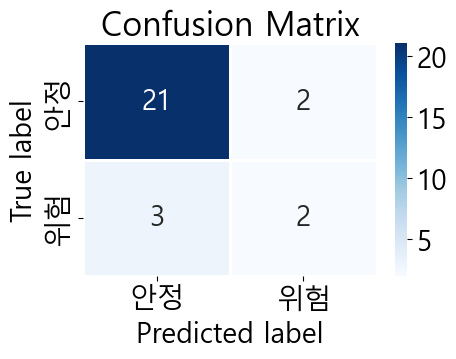

In [47]:
# 혼동행렬을 통한 예측 결과 확인
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xc)
class_names = ['안정', '위험']
fig = plt.figure(figsize = (5, 4))
ax = sns.heatmap(cm ,annot = True, cmap = 'Blues', linewidths = 1, fmt = 'd',
                xticklabels = ['안정', '위험'], yticklabels = ['안정', '위험'])
ax.set(title = 'Confusion Matrix',
      ylabel = 'True label',
      xlabel = 'Predicted label')
plt.tight_layout()

In [48]:
from sklearn.metrics import classification_report
y_pred_xc = best_model_xc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xc, target_names = ['안정', '위험']))

              precision    recall  f1-score   support

          안정       0.88      0.91      0.89        23
          위험       0.50      0.40      0.44         5

    accuracy                           0.82        28
   macro avg       0.69      0.66      0.67        28
weighted avg       0.81      0.82      0.81        28

